# Image Models Comparative Analysis 

## Data preparation and exploration

!!!The dataset used:
* [Download images.zip](https://ilearn.mq.edu.au/pluginfile.php/8707873/mod_assign/intro/images.zip?time=1691900753370)

In [1]:
#imported the file
import zipfile

with zipfile.ZipFile('images.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
#created a variable for the label names found in the provided text file
label = ['cat', 'lynx', 'wolf', 'coyote', 'cheetah', 'jaguer', 'chimpanzee', 'orangutan', 'hamster', 'guinea pig']

#created a variable for the image path
img_path = 'C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images'

###### For our initial analysis and to have a preliminary sense of the dataset, a function that counts all the labels found in the dataset has been defined.

In [3]:
#imported necessary packages
import os
from collections import Counter

#returns all filenames in training folder, selects only the first index which pertains to the identifier or classification of the label
def call_counts(path):
    integer_list = []
    label_code_list = [filename.split('_')[0] for filename in os.listdir(path)]
    fixed_list = label_code_list[:5000]
    for code in fixed_list:
        integer_code = int(code)
        integer_list.append(integer_code)
    label_names = [label[i] for i in integer_list]
    count = Counter(label_names)
    return count

In [4]:
#displayed the category counts
cat_count = call_counts('C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images')
cat_count

Counter({'cat': 557,
         'lynx': 485,
         'wolf': 423,
         'coyote': 410,
         'cheetah': 509,
         'jaguer': 524,
         'chimpanzee': 620,
         'orangutan': 557,
         'hamster': 440,
         'guinea pig': 475})

In [5]:
#imported necessary package
import matplotlib.pylab as plt

#read and got the shape of a sample image
sample_img = plt.imread('C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images\\0_img_1553496386361.jpg')
sample_img.shape

(64, 64, 3)

In [6]:
# The format of the output data.csv

In [7]:
# Iterate through the image files in the specified image folder path and sort them
#sorted_filenames = sorted(os.listdir(image_folder_path), key=lambda x: (int(x.split("_")[0]), int(x.split("_")[2].split(".")[0])))

In [8]:
#applied the code above and checked if it was successful in sorting the file names
sorted_filenames = sorted([filename for filename in os.listdir(img_path) if filename != "desktop.ini"],#excluded "desktop.ini" as this is a windows 11 issue
                          key=lambda x: (int(x.split("_")[0]), int(x.split("_")[2].split(".")[0])))

sorted_filenames

['0_img_1553496386361.jpg',
 '0_img_1553496387579.jpg',
 '0_img_1553496388640.jpg',
 '0_img_1553496389005.jpg',
 '0_img_1553496389047.jpg',
 '0_img_1553496389334.jpg',
 '0_img_1553496389439.jpg',
 '0_img_1553496389530.jpg',
 '0_img_1553496392717.jpg',
 '0_img_1553496395259.jpg',
 '0_img_1553496395836.jpg',
 '0_img_1553496397821.jpg',
 '0_img_1553496398271.jpg',
 '0_img_1553496399398.jpg',
 '0_img_1553496400254.jpg',
 '0_img_1553496402213.jpg',
 '0_img_1553496406969.jpg',
 '0_img_1553496408208.jpg',
 '0_img_1553496409297.jpg',
 '0_img_1553496409682.jpg',
 '0_img_1553496411087.jpg',
 '0_img_1553496411558.jpg',
 '0_img_1553496411624.jpg',
 '0_img_1553496414503.jpg',
 '0_img_1553496414927.jpg',
 '0_img_1553496415839.jpg',
 '0_img_1553496417274.jpg',
 '0_img_1553496418482.jpg',
 '0_img_1553496421790.jpg',
 '0_img_1553496423290.jpg',
 '0_img_1553496423952.jpg',
 '0_img_1553496425486.jpg',
 '0_img_1553496426664.jpg',
 '0_img_1553496429049.jpg',
 '0_img_1553496430360.jpg',
 '0_img_155349643301

Hints: You will need to use libraries such as `os` and `csv`.

In [9]:
#defined a function that returns the path and corresponding label of an image

def sample_images(path,label_name):
    return [(path + "/" + filenames, label_name) for filenames in sorted_filenames if label[int(filenames[0])]== label_name]


In [10]:
#defined a function that creates a CSV file that stores image paths and corresponding class labels
def sample_image_folder(path, selected_label_names, sample_numbers, output_filenames):
    result = []
    start = 0
    for i, n in enumerate(sample_numbers):
        selected_image_files = []
        for l in selected_label_names:
            image_files = sample_images(path, l)
            selected_image_files += image_files[start:start+n]

        start = start+n
        filename = output_filenames[i]
        lines = ["%s,%s\n" % fname for fname in selected_image_files]
        with open(filename, "w") as f:
            f.writelines(lines)
        result.append(filename)
    return result

In [11]:
#called the function above to create data.csv as instructed
sample_image_folder(img_path, label,(5000,),('data.csv',))

['data.csv']

In [12]:
#imported csv package
import csv

#defined a function that reads a csv file
def read_csv_file(filename):
  with open(filename,"r") as f:
    reader = csv.reader(f, delimiter=",")
    return [row for row in reader]

In [13]:
#called the function above to check if the created data.csv file and the function are working as expected
data = read_csv_file("data.csv")
data

[['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496386361.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496387579.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496388640.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496389005.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496389047.jpg',


###### From the output above, it is clear that the function and data.csv has been successfully created. The image path and corresponding labels are being displayed accurately.

In [14]:
#Calculated and displayed the total number of images from the dataset to check that no image has been missed
print("Total number of images in the dataset: " + str(len(data)))

Total number of images in the dataset: 5000


In [15]:
#Calculated and displayed the total number of unique classes from the dataset
cat_list = []
for img_list in data:
    cat = img_list[-1]
    cat_list.append(cat)
label_names = cat_list 

unique_list = []
for c in label_names:
    if c not in unique_list:
        unique_list.append(c)
print("Total number of unique classes from the dataset: " + str(len(unique_list)))
    

Total number of unique classes from the dataset: 10


In [16]:
#Calculated and displayed the count of images for each class.
    
cat_list = []
for img_list in data:
    cat = img_list[-1]
    cat_list.append(cat)
label_names = cat_list    
count = Counter(label_names)
count

Counter({'cat': 557,
         'lynx': 485,
         'wolf': 423,
         'coyote': 410,
         'cheetah': 509,
         'jaguer': 524,
         'chimpanzee': 620,
         'orangutan': 557,
         'hamster': 440,
         'guinea pig': 475})

###### We can see above that the result of using the created data.csv yields the same number of counts from the counts generated earlier using the call_counts function directly on the path of the images. This reaffirms that at this point we have accurately created the data.csv file as expected.

###### To aid us in our analysis of the dataset's balance, in the succeeding parts, we will be displaying a histogram for the dataset and we will be computing for the maximum,minimum, mean, median, standard deviation and respective class ratios.

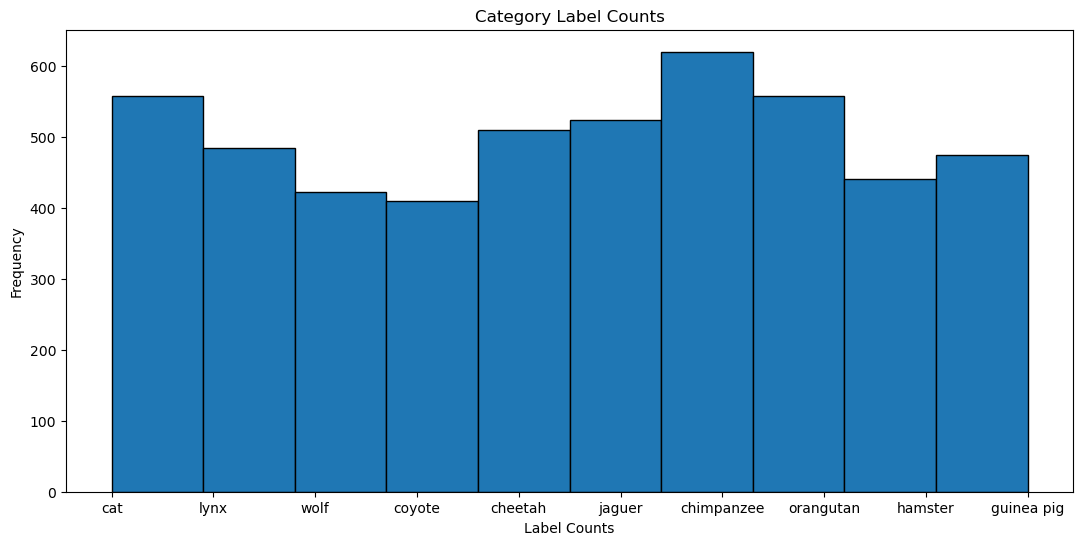

In [17]:
#created histogram
plt.figure(figsize=(13, 6))
plt.hist(label_names, bins=10, edgecolor='black')
plt.xlabel('Label Counts')
plt.ylabel('Frequency')
plt.title('Category Label Counts')
plt.show()

In [18]:
#imported numpy for the purpose of our analysis
import numpy as np

#converted the count values to a list so we can compute for their max,min, mean, median and standard deviation
count_values = list(count.values())

#computed for the count values' max,min, mean, median and standard deviation
max_value = np.max(count_values)
min_value = np.min(count_values)
mean_value = np.mean(count_values)
median_value = np.median(count_values)
std_value = np.std(count_values)

print("The maximum value of the dataset count is: " + str(max_value))
print("The minimum value of the dataset count is: " + str(min_value))
print("The mean value of the dataset count is: " + str(mean_value))
print("The median value of the dataset count is: " + str(median_value))
print("The standard deviation value of the dataset count is: " + str(std_value))

The maximum value of the dataset count is: 620
The minimum value of the dataset count is: 410
The mean value of the dataset count is: 500.0
The median value of the dataset count is: 497.0
The standard deviation value of the dataset count is: 63.27242685404125


In [19]:
#created a list of the counts of each category
cat_counts = [557,485,423,410,509,524,620,557,440,475]

#defined total_counts for the ratio calculation
total_counts = sum(cat_counts)

#defined a function that will compute for the ratios of each category

def cat_ratio(label):
    return cat_counts[label]/total_counts

In [20]:
#computed and displayed the ratios of all labels
print("The ratios of the labels are as follows:")
print("Cat ratio: " + str(cat_ratio(0)))
print("Lynx ratio: " + str(cat_ratio(1)))
print("Wolf ratio: " + str(cat_ratio(2)))
print("Coyote ratio: " + str(cat_ratio(3)))
print("Cheetah ratio: " + str(cat_ratio(4)))
print("Jaguer ratio: " + str(cat_ratio(5)))
print("Chimpanzee ratio: " + str(cat_ratio(6)))
print("Orangutan ratio: " + str(cat_ratio(7)))
print("Hamster ratio: " + str(cat_ratio(8)))
print("Guinea Pig ratio: " + str(cat_ratio(9)))

The ratios of the labels are as follows:
Cat ratio: 0.1114
Lynx ratio: 0.097
Wolf ratio: 0.0846
Coyote ratio: 0.082
Cheetah ratio: 0.1018
Jaguer ratio: 0.1048
Chimpanzee ratio: 0.124
Orangutan ratio: 0.1114
Hamster ratio: 0.088
Guinea Pig ratio: 0.095


###### Judging by the counts alone, it can be seen that the counts vary across categories and that the dataset does not seem to be perfectly balanced, which is usually the case for using real-world data. However, if we refer to the histogram, it seems that each label or category does not significantly differ from one another in frequency. Their counts appear to be closer to the counts of every other label, which is further supported by how the class ratios are close to each other. Moreover, the count values are ranging from 410-620. This means that the largest difference in frequency is about 200, which is a large number. Despite this, we need to consider that only 1 out of 10 labels went over the 600 mark. Additionally, the mean value of 500 and median value of 497 are far from the largest possible difference of about 200 counts. Lastly, the standard deviation of 63.272 is not inherently large to be definitive on a highly significant spread away from the mean. With these reasons, the dataset can be considered to be relatively balanced as the differences among the label counts are not significantly large enough to dictate or affect the results of our analysis drastically.

## Image Dataset Splitting and Visualization

In [21]:
#Got the test subset split from the above csv file

new_csv = []
for l in label:
    label_count = 0
    for img in data:
        if label_count != 10:
            category = img[-1]
            if l == category:
                new_csv.append(img)
                label_count = label_count + 1
        else:
            label_count = 0
            break

            
test_csv = new_csv

#checked if the test subset is as expected
test_csv

[['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496386361.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496387579.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496388640.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496389005.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496389047.jpg',


In [22]:
#checked length of test subset
len(test_csv) #it is as expected, 10 samples for each 10 labels

100

In [23]:
#defined a function that creates csv files
def write_csv_file(data, filename):
    with open(filename, "w", newline="") as f:
        writer = csv.writer(f, delimiter=",")
        writer.writerows(data)

#called the function to create the test.csv file
write_csv_file(test_csv, 'test.csv')

In [24]:
#called the read_csv_file function previously created to check if the created test.csv file and the write_csv_file function are working as expected
test = read_csv_file('test.csv')
test

[['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496386361.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496387579.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496388640.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496389005.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496389047.jpg',


In [25]:
#checked length of test subset coming from the read test.csv file
len(test) #it is the same as the length from the test subset above which means the creation of test.csv is successful

100

In [26]:
#Got the train subset split from the above csv file

train_csv = []
for img in data:
    if img not in test:
        train_csv.append(img)

#checked if the train subset is as expected
train_csv

[['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496395836.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496397821.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496398271.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496399398.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496400254.jpg',


In [27]:
#checked length of train subset
len(train_csv) #it is as expected since it now contains the remaining images without the 100 images included in the test subset 

4900

In [28]:
#called the function to create the train.csv file
write_csv_file(train_csv, 'train.csv')

In [29]:
#called the read_csv_file function previously created to check if the created train.csv file is as expected
train = read_csv_file('train.csv')
train

[['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496395836.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496397821.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496398271.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496399398.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496400254.jpg',


In [30]:
#checked length of train subset coming from the read train.csv file
len(train) #it is the same as the length from the train subset above which means the creation of train.csv is successful

4900

In [31]:
#checked if there are any overlapping samples between the train.csv and test.csv and printed the length of each subset
count = 0
for img in train:
    if img in test:
        count = count + 1
#printed results
print("There are " + str(count) + " overlapping samples between train.csv and test.csv")
print("The length of train.csv is " + str(len(train)))#printed the length of the train.csv
print("The length of test.csv is " + str(len(test)))#print the length of the test.csv.

There are 0 overlapping samples between train.csv and test.csv
The length of train.csv is 4900
The length of test.csv is 100


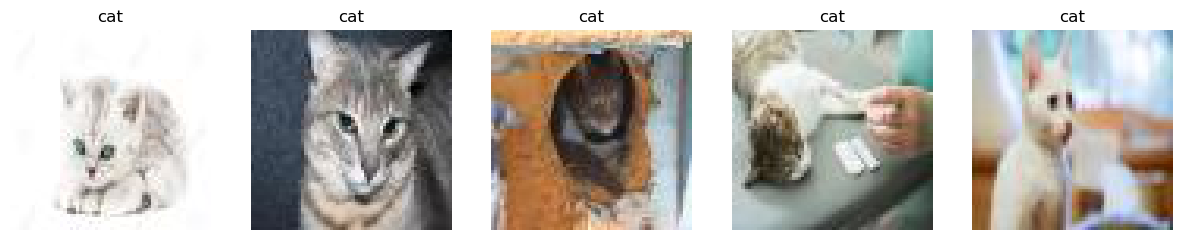

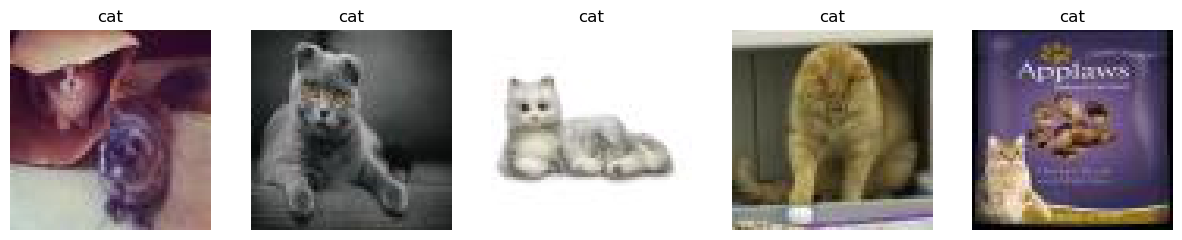

In [32]:
#displayed the first 5 images from the train.csv file along with their corresponding specific animal names
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
counter = 0
for img in train[0:5]:
    image = plt.imread(img[0])
    axes[counter].imshow(image)
    axes[counter].set_title(img[-1])
    axes[counter].axis("off")
    counter = counter + 1


#displayed the first 5 images from the test.csv file along with their corresponding specific animal names
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
counter = 0
for img in test[0:5]:
    image = plt.imread(img[0])
    axes[counter].imshow(image)
    axes[counter].set_title(img[-1])
    axes[counter].axis("off")
    counter = counter + 1
    

plt.show()
    


In [33]:
#imported necessary packages
import random
from random import shuffle
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [34]:
#using pandas read the CSV 
train_panda = pd.read_csv('train.csv', header = None)

#set column names for the dataframe
column_names = ['path', 'label']

#created copy for dataframe creation
train_copy = train_panda.copy()

#created pandas dataframe
train_df = pd.DataFrame(train_copy)

#assigned column names for the dataframe
train_df.columns = column_names

#checked the first 5 rows to see if dataframe creation with corresponding column names was successful
train_df.head()

,path,label
0,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,cat
1,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,cat
2,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,cat
3,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,cat
4,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,cat


In [35]:
#checked that number of rows is intact
train_df.shape

(4900, 2)

In [36]:
#checked the unique labels to confirm successful creation of dataframe
train_df['label'].unique()

array(['cat', 'lynx', 'wolf', 'coyote', 'cheetah', 'jaguer', 'chimpanzee',
       'orangutan', 'hamster', 'guinea pig'], dtype=object)

In [37]:
#shuffled the train set with a random state of 42 as instructed

shuffled_train = shuffle(train_df.copy(), random_state=42)

#checked the first 5 records to see if shuffling was successful
shuffled_train.head()#shuffle is successful as the first 5 records consists of different categories other than cat

,path,label
4657,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,guinea pig
3539,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,orangutan
907,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,lynx
4353,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,hamster
3745,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,orangutan


In [38]:
#checked that the data consists of the same number of records
shuffled_train.shape

(4900, 2)

In [39]:
#computed for the 30% of 4900 (total length of the train set)

val_index = len(shuffled_train)*0.3

val_index

1470.0

In [40]:
#assigned the validation set

val_set = shuffled_train[:int(val_index)]

#checked the length is equal to 30% of 4900
val_set.shape

(1470, 2)

In [41]:
#checked that the first 5 records or rows is the same with the first 5 records of the shuffled train set
#confirmed that the first set of records have been included in the validation set as instructed
val_set.head()

,path,label
4657,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,guinea pig
3539,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,orangutan
907,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,lynx
4353,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,hamster
3745,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,orangutan


In [42]:
#assigned the new training set

train_new = shuffled_train[int(val_index):]

#checked the length is equal to 70% of 4900
len(train_new) == 0.7 * len(shuffled_train)

True

In [43]:
#compared the last 5 records of the validation set and the first 5 records of the new training set, ensured no duplicate records

val_set.tail()

,path,label
4236,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,hamster
4458,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,guinea pig
3378,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,chimpanzee
1503,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,coyote
1971,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,cheetah


In [44]:
#compared the last 5 records of the validation set and the first 5 records of the new training set, ensured no duplicate records

train_new.head()

,path,label
736,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,lynx
1620,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,coyote
336,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,cat
2302,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,cheetah
2673,C:\Users\rodul\OneDrive\Desktop\Macquarie\seco...,jaguer


In [45]:
#converted the validation set to a list in preparation for csv creation
val_list = val_set.values.tolist()

#checked that the length has been unchanged
len(val_list)

1470

In [46]:
#checked format is as expected
val_list

[['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/9_img_1553496788512.jpg',
  'guinea pig'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/7_img_1553496534686.jpg',
  'orangutan'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/1_img_1553496975681.jpg',
  'lynx'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/8_img_1553497018812.jpg',
  'hamster'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/7_img_15

In [47]:
#converted the new training set to a list in preparation for csv creation
train_new_list = train_new.values.tolist()

#checked that the length has been unchanged
len(train_new_list) == 0.7 * len(shuffled_train)

True

In [48]:
#checked format is as expected
train_new_list

[['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/1_img_1553496728292.jpg',
  'lynx'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/3_img_1553496765330.jpg',
  'coyote'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496891150.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/4_img_1553497118534.jpg',
  'cheetah'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/5_img_155349690994

In [49]:
#called the write_csv_file function to create the val.csv file
write_csv_file(val_list, 'val.csv')

In [50]:
#called the read_csv_file function to check if the created val.csv file is as expected
validation = read_csv_file('val.csv')
validation

[['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/9_img_1553496788512.jpg',
  'guinea pig'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/7_img_1553496534686.jpg',
  'orangutan'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/1_img_1553496975681.jpg',
  'lynx'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/8_img_1553497018812.jpg',
  'hamster'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/7_img_15

In [51]:
#checked length of validation subset coming from the val.csv file
len(validation) #it is the same as the length from the validation set above which means the creation of val.csv is successful

1470

In [52]:
#called the write_csv_file function to create the train_new.csv file
write_csv_file(train_new_list, 'train_new.csv')

In [53]:
#called the read_csv_file function to check if the created train_new.csv file is as expected
new_train_set = read_csv_file('train_new.csv')
new_train_set

[['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/1_img_1553496728292.jpg',
  'lynx'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/3_img_1553496765330.jpg',
  'coyote'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/0_img_1553496891150.jpg',
  'cat'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/4_img_1553497118534.jpg',
  'cheetah'],
 ['C:\\Users\\rodul\\OneDrive\\Desktop\\Macquarie\\second_sem_2023\\COMP_6420_AI_Text_Vision\\Assignments\\COMP-6420-AI-Text-Vision-ASSIGNMENTS\\Assignment 2\\images/5_img_155349690994

In [54]:
#checked length of the new training set coming from the train_new.csv file is intact
len(new_train_set)== len(train_new_list)

True

In [55]:
#displayed the first five labels in the train_new data
print("The first five labels in the train_new data is as follows:")
for img in new_train_set[0:5]:
    print(img[-1])

The first five labels in the train_new data is as follows:
lynx
coyote
cat
cheetah
jaguer


In [56]:
#displayed the first five labels in the val data

print("The first five labels in the val data is as follows:")
for img in validation[0:5]:
    print(img[-1])

The first five labels in the val data is as follows:
guinea pig
orangutan
lynx
hamster
orangutan


## Deep Neural Networks

!!!The dataset used:
* [Download all.zip](https://ilearn.mq.edu.au/pluginfile.php/8707873/mod_assign/intro/all.zip)
* [Download train_new.csv](https://ilearn.mq.edu.au/pluginfile.php/8707873/mod_assign/intro/train_new.csv)
* [Download val.csv](https://ilearn.mq.edu.au/pluginfile.php/8707873/mod_assign/intro/val.csv)
* [Download test.csv](https://ilearn.mq.edu.au/pluginfile.php/8707873/mod_assign/intro/test.csv)

In [6]:
import numpy as np
import random
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import models
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras.optimizers import SGD

# Set random seed for Numpy
np.random.seed(42)

# Set random seed for Python
random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)


In [58]:
#imported the new file
import zipfile

with zipfile.ZipFile('new_set/all.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
# Set random seed for Numpy
np.random.seed(42)

# Set random seed for Python
random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)

NameError: name 'np' is not defined

In [4]:
#Recall earlier that when we took the shape of a sample image from Q1.1 the dimensions are (64, 64, 3)
#Set the dimensions of the image in preparation for image processing
IMG_HEIGHT = 64
IMG_WIDTH = 64
IMG_CHANNELS = 3
CLASS_NAMES = ['cat', 'lynx', 'wolf', 'coyote', 'cheetah', 'jaguer', 'chimpanzee', 'orangutan', 'hamster', 'guinea pig']

In [9]:
#defined a function that reads and processes images
def read_and_decode(filename, reshape_dims):
    img = tf.io.read_file(filename)#reads images
    img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)#converts to 3D uint8 tensor,ensures normalization suitability to [0, 255] range
    img = tf.cast(img, tf.float32)#ensures images are in float32 before dividing by 255
    img = img / 255.0 #divided pixel values by 255 as instructed to normalize image data to the range of [0,1]
    return tf.image.resize(img, reshape_dims)

In [8]:
#defined a function that decodes csv files containing image data
def decode_csv(csv_row):
    record_defaults = ["path", "label"]
    filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    label = int(label_string)
    return img, label

In [10]:
#Read the provided train_new.csv, val.csv, and test.csv files and assigned to corresponding variables and batch sizes as stated
train_dataset = (tf.data.TextLineDataset("new_set/train_new.csv").skip(1).map(decode_csv)).batch(32)

val_dataset = (tf.data.TextLineDataset("new_set/val.csv").skip(1).map(decode_csv)).batch(32)

test_dataset = (tf.data.TextLineDataset("new_set/test.csv").skip(1).map(decode_csv)).batch(32)

In [64]:
#displayed the labels of the first batch from the train dataset, validation dataset, and test dataset.¶

for path, label in train_dataset.take(1):
    numpy_path = path.numpy()
    numpy_label = label.numpy()
    print("The labels of the first batch from the train dataset are as follows:")
    print(numpy_label)

for path, label in val_dataset.take(1):
    numpy_path = path.numpy()
    numpy_label = label.numpy()
    print("The labels of the first batch from the validation dataset are as follows:")
    print(numpy_label)

for path, label in test_dataset.take(1):
    numpy_path = path.numpy()
    numpy_label = label.numpy()
    print("The labels of the first batch from the test dataset are as follows:")
    print(numpy_label)

The labels of the first batch from the train dataset are as follows:
[4 6 7 2 7 2 5 9 4 5 7 0 2 5 9 9 4 5 9 9 5 6 3 3 6 4 1 8 6 8 9 0]
The labels of the first batch from the validation dataset are as follows:
[4 9 7 2 2 0 1 2 4 0 9 5 4 4 9 4 7 5 7 6 7 0 9 6 8 1 8 4 5 2 8 8]
The labels of the first batch from the test dataset are as follows:
[2 8 2 9 6 8 0 4 0 8 7 5 0 2 4 0 0 7 4 7 5 2 3 2 5 3 5 1 6 9 3 2]


### Simple model creation with the following requirements:

1. Build a sequential model with the following layers:
   * A Flatten layer.
   * A hiden layer with 16 units and the ReLU activation function.
   * The output layer with the correct size and the softmax activation function.
2. Compile the model using the following settings:
   * Optimizer: SGD
   * Loss function: Sparse categorical cross-entropy
   * Metrics: Accuracy
3. Train the model `history = model1.fit(XXXXXXX)` with the following settings:
   * Number of epochs: 10
   * EarlyStopping with a patience of 4
   * ModelCheckpoint to save the best model with the filename 'best.model.Q2.2'

In [65]:
# Set random seed for Numpy
np.random.seed(42)

# Set random seed for Python
random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)

In [66]:
#imported necessary packages
import tensorflow_hub as hub
import os
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

#defined function that will help create the model
def train_and_evaluate(lrate = 0.001,num_hidden = 16,epochs = 10):
    model1 = tf.keras.Sequential(name='animals_classification')
    model1.add(tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))#introduced flatten layer as instructed
    model1.add(tf.keras.layers.Dense(num_hidden,#16 units was set as instructed
                                    activation='relu',#relu activation was used as instructed
                                    name='dense_hidden'))
    model1.add(tf.keras.layers.Dense(len(CLASS_NAMES),#set size to the number of labels for correct size
                                    activation='softmax',#set activation to softmax as instructed
                                    name='animals'))
    model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lrate),#set optimizer to SGD as instructed
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),#set loss function to sparsecategoricalcrossentropy
                  metrics=['accuracy'])#set metrics to accuracy as instructed
    print(model1.summary())
    history = model1.fit(train_dataset, validation_data=val_dataset, epochs=epochs,#epochs was set to 10 as instructed
                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=4),#patience was set to 4
                                    tf.keras.callbacks.ModelCheckpoint("best.model.Q2.2",save_best_only=True)])#set filename to best.model.Q2.2
    
    return model1

In [67]:
#defined the sequential model by calling the above function
model1 = train_and_evaluate()

Model: "animals_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense_hidden (Dense)        (None, 16)                196624    
                                                                 
 animals (Dense)             (None, 10)                170       
                                                                 
Total params: 196794 (768.73 KB)
Trainable params: 196794 (768.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
    217/Unknown - 3s 12ms/step - loss: 2.2986 - accuracy: 0.1161INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 7s 30ms/step - loss: 2.2986 - accuracy: 0.1157 - val_loss: 2.3031 - val_accuracy: 0.1260
Epoch 2/10
217/219 [============================>.] - ETA: 0s - loss: 2.2876 - accuracy: 0.1218INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 4s 16ms/step - loss: 2.2876 - accuracy: 0.1216 - val_loss: 2.2994 - val_accuracy: 0.1227
Epoch 3/10
214/219 [============================>.] - ETA: 0s - loss: 2.2698 - accuracy: 0.1307INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 4s 19ms/step - loss: 2.2693 - accuracy: 0.1306 - val_loss: 2.2977 - val_accuracy: 0.1047
Epoch 4/10
211/219 [===========================>..] - ETA: 0s - loss: 2.2495 - accuracy: 0.1389INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 5s 22ms/step - loss: 2.2496 - accuracy: 0.1380 - val_loss: 2.2899 - val_accuracy: 0.1020
Epoch 5/10
215/219 [============================>.] - ETA: 0s - loss: 2.2369 - accuracy: 0.1504INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 4s 20ms/step - loss: 2.2369 - accuracy: 0.1496 - val_loss: 2.2822 - val_accuracy: 0.1080
Epoch 6/10
215/219 [============================>.] - ETA: 0s - loss: 2.2254 - accuracy: 0.1615INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 5s 22ms/step - loss: 2.2254 - accuracy: 0.1610 - val_loss: 2.2762 - val_accuracy: 0.1247
Epoch 7/10
214/219 [============================>.] - ETA: 0s - loss: 2.2150 - accuracy: 0.1713INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 4s 17ms/step - loss: 2.2145 - accuracy: 0.1711 - val_loss: 2.2713 - val_accuracy: 0.1380
Epoch 8/10
213/219 [============================>.] - ETA: 0s - loss: 2.2037 - accuracy: 0.1828INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 4s 20ms/step - loss: 2.2036 - accuracy: 0.1829 - val_loss: 2.2651 - val_accuracy: 0.1467
Epoch 9/10
215/219 [============================>.] - ETA: 0s - loss: 2.1939 - accuracy: 0.1876INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 4s 19ms/step - loss: 2.1938 - accuracy: 0.1874 - val_loss: 2.2590 - val_accuracy: 0.1507
Epoch 10/10
211/219 [===========================>..] - ETA: 0s - loss: 2.1840 - accuracy: 0.1943INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 4s 18ms/step - loss: 2.1841 - accuracy: 0.1937 - val_loss: 2.2519 - val_accuracy: 0.1627


In [68]:
# Set random seed for Numpy
np.random.seed(42)

# Set random seed for Python
random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)

In [69]:
#imported necessary packages
import matplotlib.pylab as plt

#defined a function that will create the required set of subplots 
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_' + metric],ls='dashed');#set training values as solid lines, while the validation values are plotted as dashed lines
        ax[idx].legend([metric, 'val_' + metric])#indicated legend with metric name and corresponding validation metric as required


In [70]:
#redefined the function to include the calling of training plot function so that the subplots will be created accurately

def train_and_evaluate(lrate = 0.001,num_hidden = 16,epochs = 10):
    model1 = tf.keras.Sequential(name='animals_classification')
    model1.add(tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))#introduced flatten layer as instructed
    model1.add(tf.keras.layers.Dense(num_hidden,#16 units was set as instructed
                                    activation='relu',#relu activation was used as instructed
                                    name='dense_hidden'))
    model1.add(tf.keras.layers.Dense(len(CLASS_NAMES),#set size to the number of labels for correct size
                                    activation='softmax',#set activation to softmax as instructed
                                    name='animals'))
    model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = lrate),#set optimizer to SGD as instructed
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),#set loss function to sparsecategoricalcrossentropy
                  metrics=['accuracy'])#set metrics to accuracy as instructed
    print(model1.summary())
    history = model1.fit(train_dataset, validation_data=val_dataset, epochs=epochs,#epochs was set to 10 as instructed
                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=4),#patience was set to 4
                                    tf.keras.callbacks.ModelCheckpoint("best.model.Q2.2",save_best_only=True)])#set filename to best.model.Q2.2
    
    training_plot(['loss', 'accuracy'], history)#set metrics to loss and accuracy as instructed
    return model1

Model: "animals_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_hidden (Dense)        (None, 16)                196624    
                                                                 
 animals (Dense)             (None, 10)                170       
                                                                 
Total params: 196794 (768.73 KB)
Trainable params: 196794 (768.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
    216/Unknown - 3s 12ms/step - loss: 2.2987 - accuracy: 0.1165INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 5s 19ms/step - loss: 2.2986 - accuracy: 0.1157 - val_loss: 2.3031 - val_accuracy: 0.1260
Epoch 2/10
219/219 [==============================] - ETA: 0s - loss: 2.2876 - accuracy: 0.1216INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 4s 19ms/step - loss: 2.2876 - accuracy: 0.1216 - val_loss: 2.2994 - val_accuracy: 0.1227
Epoch 3/10
214/219 [============================>.] - ETA: 0s - loss: 2.2698 - accuracy: 0.1307INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 4s 20ms/step - loss: 2.2693 - accuracy: 0.1306 - val_loss: 2.2977 - val_accuracy: 0.1047
Epoch 4/10
214/219 [============================>.] - ETA: 0s - loss: 2.2500 - accuracy: 0.1381INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 3s 16ms/step - loss: 2.2496 - accuracy: 0.1380 - val_loss: 2.2899 - val_accuracy: 0.1020
Epoch 5/10
218/219 [============================>.] - ETA: 0s - loss: 2.2371 - accuracy: 0.1497INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 5s 20ms/step - loss: 2.2369 - accuracy: 0.1496 - val_loss: 2.2822 - val_accuracy: 0.1080
Epoch 6/10
213/219 [============================>.] - ETA: 0s - loss: 2.2255 - accuracy: 0.1612INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 3s 16ms/step - loss: 2.2254 - accuracy: 0.1610 - val_loss: 2.2762 - val_accuracy: 0.1247
Epoch 7/10
214/219 [============================>.] - ETA: 0s - loss: 2.2150 - accuracy: 0.1713INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 5s 21ms/step - loss: 2.2145 - accuracy: 0.1711 - val_loss: 2.2713 - val_accuracy: 0.1380
Epoch 8/10
217/219 [============================>.] - ETA: 0s - loss: 2.2034 - accuracy: 0.1825INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 4s 19ms/step - loss: 2.2036 - accuracy: 0.1829 - val_loss: 2.2651 - val_accuracy: 0.1467
Epoch 9/10
214/219 [============================>.] - ETA: 0s - loss: 2.1945 - accuracy: 0.1875INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 4s 19ms/step - loss: 2.1938 - accuracy: 0.1874 - val_loss: 2.2590 - val_accuracy: 0.1507
Epoch 10/10
219/219 [==============================] - ETA: 0s - loss: 2.1841 - accuracy: 0.1937INFO:tensorflow:Assets written to: best.model.Q2.2\assets


INFO:tensorflow:Assets written to: best.model.Q2.2\assets


219/219 [==============================] - 4s 18ms/step - loss: 2.1841 - accuracy: 0.1937 - val_loss: 2.2519 - val_accuracy: 0.1627


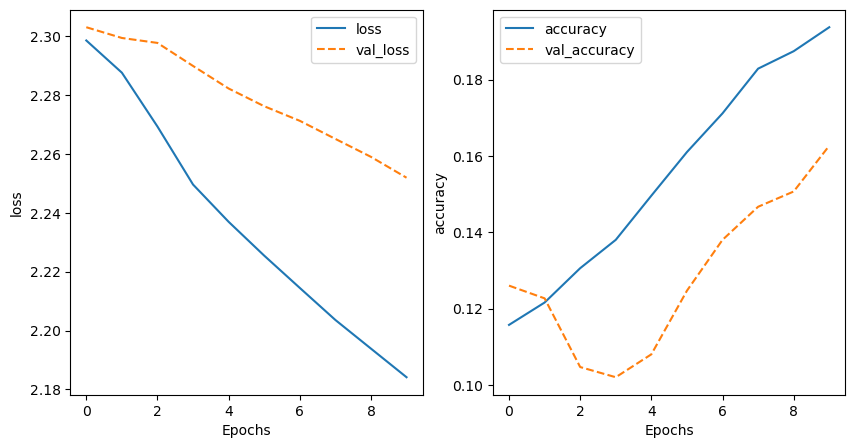

In [71]:
#called the function again to create the subplots

model1 = train_and_evaluate()

###### We can see from the graph that the solid line(training data) is consistently below the dashed line (validation data) for loss; and consistently above for accuracy. This hints that the model is overfitting. The goal is supposedly to strike a balance where the training data (solid lines) and validation data (dashed lines) are close to each other, indicating that the model is learning the underlying patterns and not just memorizing the training data. Moreover, we can observe from the graph and the corresponding numerical values that validation loss is still consistently decreasing. One approach to suppress this is to further increase the number of epochs. Looking at the accuracy plot above, it seems that as the number of epochs increase, the dashed lines (validation data) become closer to the solid lines (training data). This signifies that if we increase the number of epochs we may possibly lessen overfitting.

In [72]:
#tested the model with the test data as instructed
test_loss, test_accuracy = model1.evaluate(test_dataset)


47/47 [==============================] - 1s 16ms/step - loss: 2.2555 - accuracy: 0.1440


In [73]:
#reported the test accuracy as instructed along with test loss
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Test loss: 2.2554521560668945
Test accuracy: 0.14399999380111694


###### Our test set accuracy is about 14.4%, which is a bit lower than the training set accuracy of around 19.37% and validation set accuracy of about 16.27%. Since the model tend to perform worse on the test data then there might be a problem of overfitting.

###### To further test the model, we will be visualizing the predictions on a sampled data, and see how the model performs.

In [74]:
#defined a function that will test the model by predicting and plot the predictions for ease of viewing
#sampled only 15 images to be displayed as it is impractical to show all 1500 images from the test set
def plot_predictions(model):
    f, ax = plt.subplots(3, 5, figsize=(25,15))
    dataset = test_dataset #set the dataset to test dataset
    idx_counter = 0
    row_counter = 0
    for idx, (images, labels) in enumerate(dataset.take(1)):
        for ind, img in enumerate(images):
                if idx_counter > 4:#set the following counters to limit the images to be displayed to the first 15 images
                    idx_counter = 0
                    row_counter = row_counter + 1
                    if row_counter > 2:
                        break
                ax[row_counter,idx_counter].imshow(img.numpy());
                batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
                batch_pred = model.predict(batch_image)
                pred = batch_pred[0]
                pred_label_index = tf.math.argmax(pred).numpy()
                pred_label = CLASS_NAMES[pred_label_index]
                prob = pred[pred_label_index]
                label = labels[ind]
                label = CLASS_NAMES[label.numpy()]
                
                ax[row_counter,idx_counter].set_title('{}: {} ({:.4f})'.format(label, pred_label, prob))
                ax[row_counter,idx_counter].axis('off')
                idx_counter = idx_counter + 1
                
    plt.show()

1/1 [==============================] - 0s 34ms/step


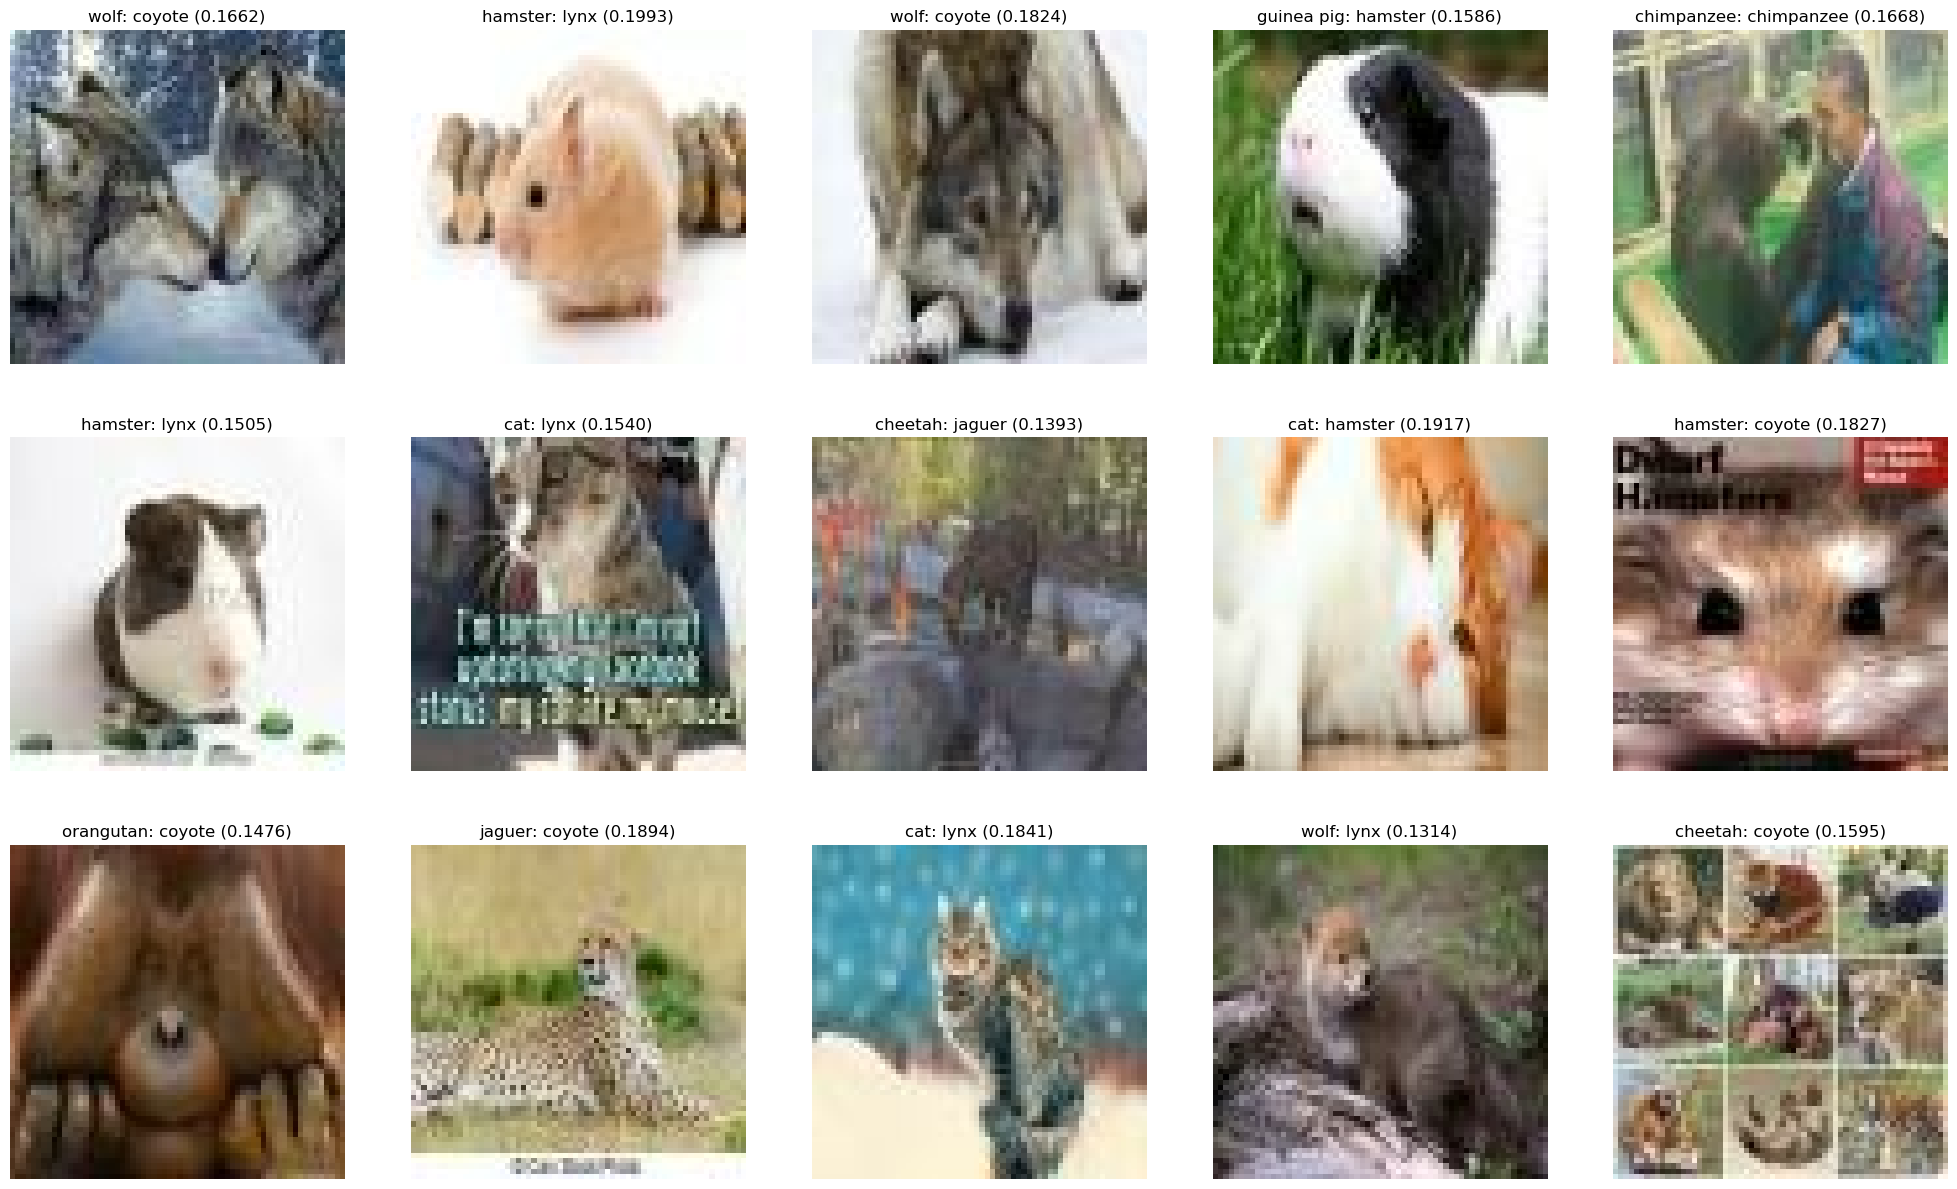

In [75]:
#called the function above to display the 15 first predictions on the test dataset
plot_predictions(model1)

In [76]:
#cross-checked to see if the images displayed above and their corresponding predictions are accurate
predictions = model1.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis =1)

predicted_labels[0:15]

47/47 [==============================] - 1s 10ms/step


array([3, 1, 3, 8, 6, 1, 1, 5, 8, 3, 3, 3, 1, 1, 3], dtype=int64)

From this sample of 15 images, we can see that only 1 out of 15 have been correctly labeled which is as expected with our low rate of accuracy.

### Error Analysis

In [77]:
# Set random seed for Numpy
np.random.seed(42)

# Set random seed for Python
random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)

###### Given test accuracy = total number of correct predictions / total samples, then the accuracy for each category/label will be computed in the succeeding steps. In order for us to compute the accuracy for each category/label, we will be consolidating all actual labels and all predicted labels for ease of computations.

In [78]:
#assigning the model we created earlier, model1 to model for ease of code referencing
model = model1

#created lists that will consolidate all actual and predicted labels
actual_labels_list = []
predicted_labels_list = []

#created a loop that will go through the whole test dataset
for batch_data in test_dataset:
    images, labels = batch_data
    batch_predictions = model.predict(images)#executes predictions
    predicted_labels = tf.argmax(batch_predictions, axis=1).numpy()#assigns list or batch of predictions to predicted_labels
    actual_labels = labels.numpy()#assigns list or batch of labels to actual_labels
    actual_labels_list.extend(actual_labels)#iteratively stores the list or batch of actual labels to actual_labels_list
    predicted_labels_list.extend(predicted_labels)#iteratively stores the list or batch of predicted labels to predicted_labels_list

1/1 [==============================] - 0s 34ms/step


###### We can see from the result that the actual_labels_list and predicted_labels_list contains 47 batches as expected. 47 batches are expected because 1500 samples divided by 32 images batched would result to 47 batches of 32 images. We will further check if our process is successful below by checking the length of each list.

In [79]:
#checked that the actual_labels_list and predicted_labels_list contains 1500 samples

print("Actual Labels list: " + str(len(actual_labels_list)))
print("Predicted Labels list: " + str(len(predicted_labels_list)))

Actual Labels list: 1500
Predicted Labels list: 1500


In [80]:
#checked the first 15 samples of each list

print("First 15 actual labels are as follows: ")
print(actual_labels_list[:15])
print("First 15 predicted labels are as follows: ")
print(predicted_labels_list[:15])

First 15 actual labels are as follows: 
[2, 8, 2, 9, 6, 8, 0, 4, 0, 8, 7, 5, 0, 2, 4]
First 15 predicted labels are as follows: 
[3, 1, 3, 8, 6, 1, 1, 5, 8, 3, 3, 3, 1, 1, 3]


###### We can see from the result that the actual labels are the same as the labels from the provided test dataset csv file. We can also see that the first 15 predicted labels is the same as the labels we predicted on the last portion of Question 2.3, thus, confirming the accuracy of the lists we created. As a consequence, we can now proceed to use these lists to first help us in computing for each category's accuracy, and later on, display the images of the classification errors.

In [81]:
#defined a function that computes the accuracy of a category

def get_accuracy(label):
    index_list = []
    total_samples = 0
    for idx, l in enumerate(actual_labels_list):
        if l == label:
            total_samples = total_samples + 1
            if predicted_labels_list[idx] == 1:
                index_list.append(idx)
    correct = len(index_list)
    accuracy = correct/total_samples
    return accuracy

In [82]:
#computed and displayed the accuracy of all labels
print("The accuracy of the labels are as follows:")
print("Cat accuracy: " + str(get_accuracy(0)))
print("Lynx accuracy: " + str(get_accuracy(1)))
print("Wolf accuracy: " + str(get_accuracy(2)))
print("Coyote accuracy: " + str(get_accuracy(3)))
print("Cheetah accuracy: " + str(get_accuracy(4)))
print("Jaguer accuracy: " + str(get_accuracy(5)))
print("Chimpanzee accuracy: " + str(get_accuracy(6)))
print("Orangutan accuracy: " + str(get_accuracy(7)))
print("Hamster accuracy: " + str(get_accuracy(8)))
print("Guinea Pig accuracy: " + str(get_accuracy(9)))

The accuracy of the labels are as follows:
Cat accuracy: 0.18181818181818182
Lynx accuracy: 0.12307692307692308
Wolf accuracy: 0.13245033112582782
Coyote accuracy: 0.10135135135135136
Cheetah accuracy: 0.08823529411764706
Jaguer accuracy: 0.041666666666666664
Chimpanzee accuracy: 0.10119047619047619
Orangutan accuracy: 0.029940119760479042
Hamster accuracy: 0.1893939393939394
Guinea Pig accuracy: 0.12352941176470589


###### The category that reports the best accuracy results on the test data is on Hamster with an accuracy of about 18.94%, followed by Cat with about 18.18%.

###### The category that reports the worst accuracy results on the test data is on Orangutan with an accuracy of only about 2.99%, followed by Jaguer with about 4.17%.

###### Now that we have made our preliminary analysis on the accuracy results of the test data, we will proceed to display the incorrect chimpanzee predictions on lynx as instructed. Before we display the images of classfication errors where the actual label is lynx but the predicted label is chimpanzee, we will be performing preliminary steps to ensure that the program we will be executing is correct.

###### In the next step, we will be using the created lists to get the indices and the number of lynx images that had chimpanzee predictions.

In [83]:
#matched lynx images that had chimpanzee predictions
index_list = []
for idx, l in enumerate(actual_labels_list):
    if l == 1:#label for lynx
        if predicted_labels_list[idx] == 6:#label for chimpanzee
            index_list.append(idx)

index_list


[263, 352, 719, 1075, 1427]

###### From the result, we can see that there are only 5 matches so we can prepare the subplots below to cater to 5 images.

1/1 [==============================] - 0s 35ms/step


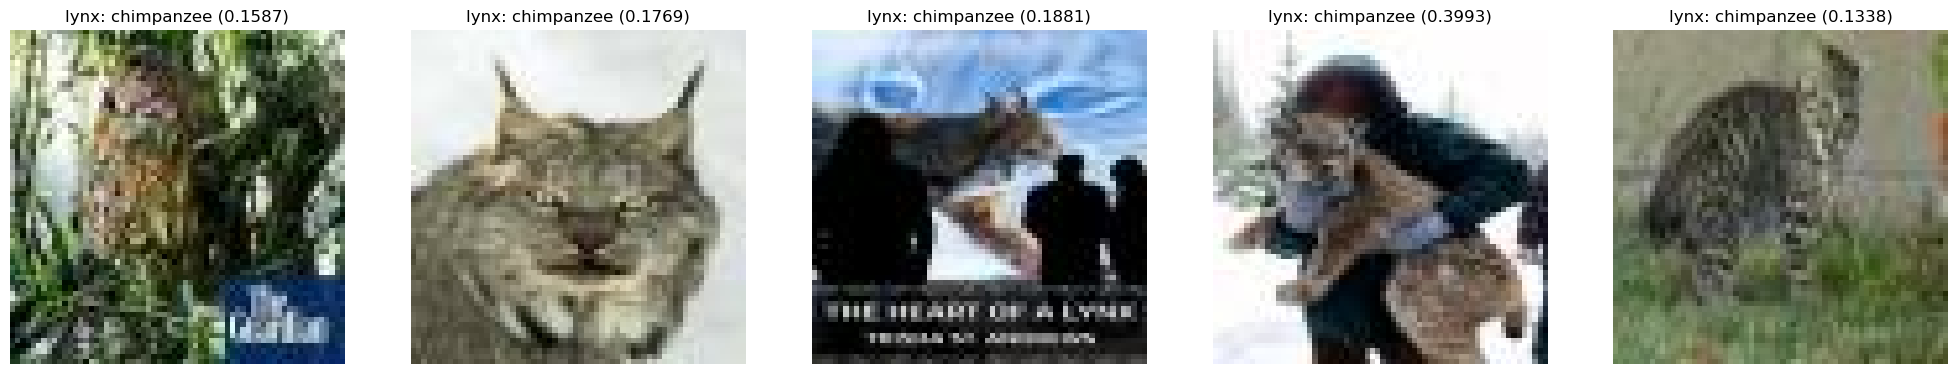

In [84]:
#displayed images of classification errors where the actual label is lynx but the predicted label is chimpanzee
f, ax = plt.subplots(1, 5, figsize=(25,15))#set to 5 subplots to cater to 5 images
idx_counter = 0
for batch_data in test_dataset:
    images, labels = batch_data
    batch_predictions = model.predict(images)
    predicted_labels = tf.argmax(batch_predictions, axis=1).numpy()
    actual_labels = labels.numpy()
    for idx, l in enumerate(actual_labels):
        if int(l) == 1:#label for lynx
            if int(predicted_labels[idx]) == 6:#label for chimpanzee
                ax[idx_counter].imshow(images[idx].numpy());
                batch_image = tf.reshape(images[idx], [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
                batch_pred = model.predict(batch_image)
                pred = batch_pred[0]
                label = CLASS_NAMES[l]#set index to label
                pred_label_index = tf.math.argmax(pred).numpy()
                pred_label = CLASS_NAMES[pred_label_index]
                prob = pred[pred_label_index]
                ax[idx_counter].set_title('{}: {} ({:.4f})'.format(label, pred_label, prob))
                ax[idx_counter].axis('off')
                idx_counter = idx_counter + 1
plt.show()  

### Optimising Neural Network Architecture.

* For the `learning_rate`, the search range is defined with a set of discrete values: `[1e-2, 1e-3, 1e-4, 1e-5, 1e-6]`. During the hyperparameter search, different learning rates will be evaluated from this predefined set of values to find the optimal value for the hyperparameter.
* For the `num_hidden`, the search range is defined with a set of discrete values: `[16, 32, 64, 128, 256]`.
* The `dropout_rate` is searched within the range of 0.0 to 0.5, with a step size of 0.1.

Then, a `BayesianOptimization` tuner object will be created to specify the objective as maximizing validation accuracy. The number of hyperparameter combinations to try `max_trials` is set to 3, the seed value for random number generation `seed` is set to 42. 

The number of epochs `epochs=20` and the EarlyStopping callback `patience=4` are used to control the training process.  And the best model found is applied to the tuner and evaluated its performance on the test dataset.

In [85]:
# Set random seed for Numpy
np.random.seed(42)

# Set random seed for Python
random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)

In [86]:
#imported necessary packages
import keras_tuner as kt

#defined the function that builds the model for the tuner
def build_model(hp):
    lrate = hp.Choice('lrate',[1e-2, 1e-3, 1e-4, 1e-5, 1e-6])#set the discrete values to [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
    num_hidden = hp.Choice('num_hidden', [16, 32, 64, 128, 256])#set the discrete values to [16, 32, 64, 128, 256] as instructed
    dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.5,step=0.1)#set the range from 0.0 to 0.5, with a step size of 0.1 

#defined the model architecture mentioned above
    model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),#consists of a flattened input layer
                                 tf.keras.layers.Dense(num_hidden,activation=tf.keras.activations.relu),#two hidden layers with ReLU activation
                                 tf.keras.layers.Dropout(dropout_rate),#dropout layer
                                 tf.keras.layers.Dense(num_hidden,activation=tf.keras.activations.relu),#two hidden layers with ReLU activation
                                 tf.keras.layers.Dropout(dropout_rate),#dropout layer
                                 tf.keras.layers.Dense(len(CLASS_NAMES),activation='softmax')])#output layer with softmax activation
  
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lrate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    return model

#defined the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective('val_accuracy', 'max'),#specified the objective as maximizing validation accuracy as instructed
    max_trials=3,#set max_trials to 3 as instructed
    seed = 42,#set the seed value for random number generation seed to 42 as instructed
    num_initial_points=2, 
    overwrite=True)#made sure any existing saved search results or configurations for the tuner will be overwritten or cleared before starting a new search..

#executed the search
tuner.search(
    train_dataset, validation_data=val_dataset,#performed the hyperparameter search using the training and validation datasets
    epochs=20, #set the number of epochs to 20 as instructed
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=4)] #set patience to 4 as instructed
)

#displayed results
topN = 1
for x in range(topN):
  print(tuner.get_best_hyperparameters(topN)[x].values)
  print(tuner.get_best_models(topN)[x].summary())

Trial 3 Complete [00h 02m 56s]
val_accuracy: 0.25333333015441895

Best val_accuracy So Far: 0.27666667103767395
Total elapsed time: 00h 07m 11s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


{'lrate': 0.001, 'num_hidden': 256, 'dropout': 0.1}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 256)               3145984   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Tota

None


In [87]:
#assigned the best model found by the tuner to best_model variable
best_model = tuner.get_best_models(1)[0]

#evaluated its performance on the test dataset
test_loss, test_accuracy = best_model.evaluate(test_dataset)

47/47 [==============================] - 1s 21ms/step - loss: 2.0767 - accuracy: 0.2513


Epoch 1/10
    218/Unknown - 8s 30ms/step - loss: 2.0071 - accuracy: 0.2970INFO:tensorflow:Assets written to: best.model.Q2.5\assets


INFO:tensorflow:Assets written to: best.model.Q2.5\assets


219/219 [==============================] - 10s 41ms/step - loss: 2.0072 - accuracy: 0.2970 - val_loss: 2.0717 - val_accuracy: 0.2760
Epoch 2/10
219/219 [==============================] - ETA: 0s - loss: 2.0001 - accuracy: 0.2961INFO:tensorflow:Assets written to: best.model.Q2.5\assets


INFO:tensorflow:Assets written to: best.model.Q2.5\assets


219/219 [==============================] - 9s 42ms/step - loss: 2.0001 - accuracy: 0.2961 - val_loss: 2.0643 - val_accuracy: 0.2760
Epoch 3/10
219/219 [==============================] - 7s 34ms/step - loss: 1.9898 - accuracy: 0.3031 - val_loss: 2.0663 - val_accuracy: 0.2773
Epoch 4/10
217/219 [============================>.] - ETA: 0s - loss: 1.9866 - accuracy: 0.3031INFO:tensorflow:Assets written to: best.model.Q2.5\assets


INFO:tensorflow:Assets written to: best.model.Q2.5\assets


219/219 [==============================] - 10s 44ms/step - loss: 1.9862 - accuracy: 0.3039 - val_loss: 2.0564 - val_accuracy: 0.2747
Epoch 5/10
219/219 [==============================] - 10s 46ms/step - loss: 1.9812 - accuracy: 0.3004 - val_loss: 2.0582 - val_accuracy: 0.2760
Epoch 6/10
218/219 [============================>.] - ETA: 0s - loss: 1.9735 - accuracy: 0.3059INFO:tensorflow:Assets written to: best.model.Q2.5\assets


INFO:tensorflow:Assets written to: best.model.Q2.5\assets


219/219 [==============================] - 11s 52ms/step - loss: 1.9736 - accuracy: 0.3057 - val_loss: 2.0523 - val_accuracy: 0.2800
Epoch 7/10
218/219 [============================>.] - ETA: 0s - loss: 1.9683 - accuracy: 0.3102INFO:tensorflow:Assets written to: best.model.Q2.5\assets


INFO:tensorflow:Assets written to: best.model.Q2.5\assets


219/219 [==============================] - 10s 47ms/step - loss: 1.9684 - accuracy: 0.3100 - val_loss: 2.0492 - val_accuracy: 0.2827
Epoch 8/10
217/219 [============================>.] - ETA: 0s - loss: 1.9596 - accuracy: 0.3125INFO:tensorflow:Assets written to: best.model.Q2.5\assets


INFO:tensorflow:Assets written to: best.model.Q2.5\assets


219/219 [==============================] - 11s 49ms/step - loss: 1.9595 - accuracy: 0.3127 - val_loss: 2.0454 - val_accuracy: 0.2787
Epoch 9/10
217/219 [============================>.] - ETA: 0s - loss: 1.9467 - accuracy: 0.3214INFO:tensorflow:Assets written to: best.model.Q2.5\assets


INFO:tensorflow:Assets written to: best.model.Q2.5\assets


219/219 [==============================] - 10s 45ms/step - loss: 1.9471 - accuracy: 0.3214 - val_loss: 2.0426 - val_accuracy: 0.2827
Epoch 10/10
219/219 [==============================] - ETA: 0s - loss: 1.9482 - accuracy: 0.3167INFO:tensorflow:Assets written to: best.model.Q2.5\assets


INFO:tensorflow:Assets written to: best.model.Q2.5\assets


219/219 [==============================] - 11s 49ms/step - loss: 1.9482 - accuracy: 0.3167 - val_loss: 2.0416 - val_accuracy: 0.2787


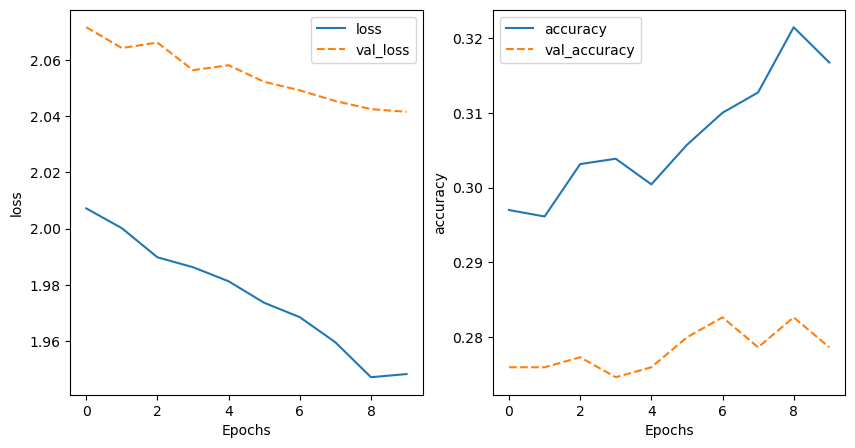

In [88]:
#fitted the best model found by the tuner
#same settings have been used with the previous model for a good comparison
history = best_model.fit(train_dataset, validation_data=val_dataset, epochs=10,
                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=4),
                                    tf.keras.callbacks.ModelCheckpoint("best.model.Q2.5",save_best_only=True)])#named checkpoint as "best.model.Q2.5"

training_plot(['loss', 'accuracy'], history)#called function to create set of subplots based on metrics for comparison

###### We can see from the graph that the solid line(training data) is consistently below the dashed line (validation data) for loss; and consistently above for accuracy. It seems that the model is overfitting. Similar to the graph of the pre-tuned model, we can observe from the graph and the corresponding numerical values that validation loss is still consistently decreasing. We can also try to suppress the overfitting problem here by increasing the number of epochs but looking at the accuracy plot above, it is not clear yet that if we increase the number of epochs, the dashed lines (validation data) will approach the solid lines (training data). 

In [89]:
#printed the accuracy as instructed and printed loss
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 2.0766968727111816
Test Accuracy: 0.2513333261013031


###### Now we can see that the accuracy has significantly increased. Recall that earlier our accuracy on the test dataset was only about 14.4%. Here, it has increased to about 25.13% Moreover, our test loss earlier was about 2.26 and now it has been reduced to about 2.08 which means that the information lost has been reduced. With these said, it seems that the model has significantly improved after tuning. However, note that the accuracy for the training data is about 31.67% and about 27.87% for the validation data. This shows that the model has an overfitting problem, hence, should be used cautiously.

###### Similar to what was done earlier, for comparison's sake, we will also be visualizing the predictions on sampled test data and see how the model performs.

1/1 [==============================] - 0s 46ms/step


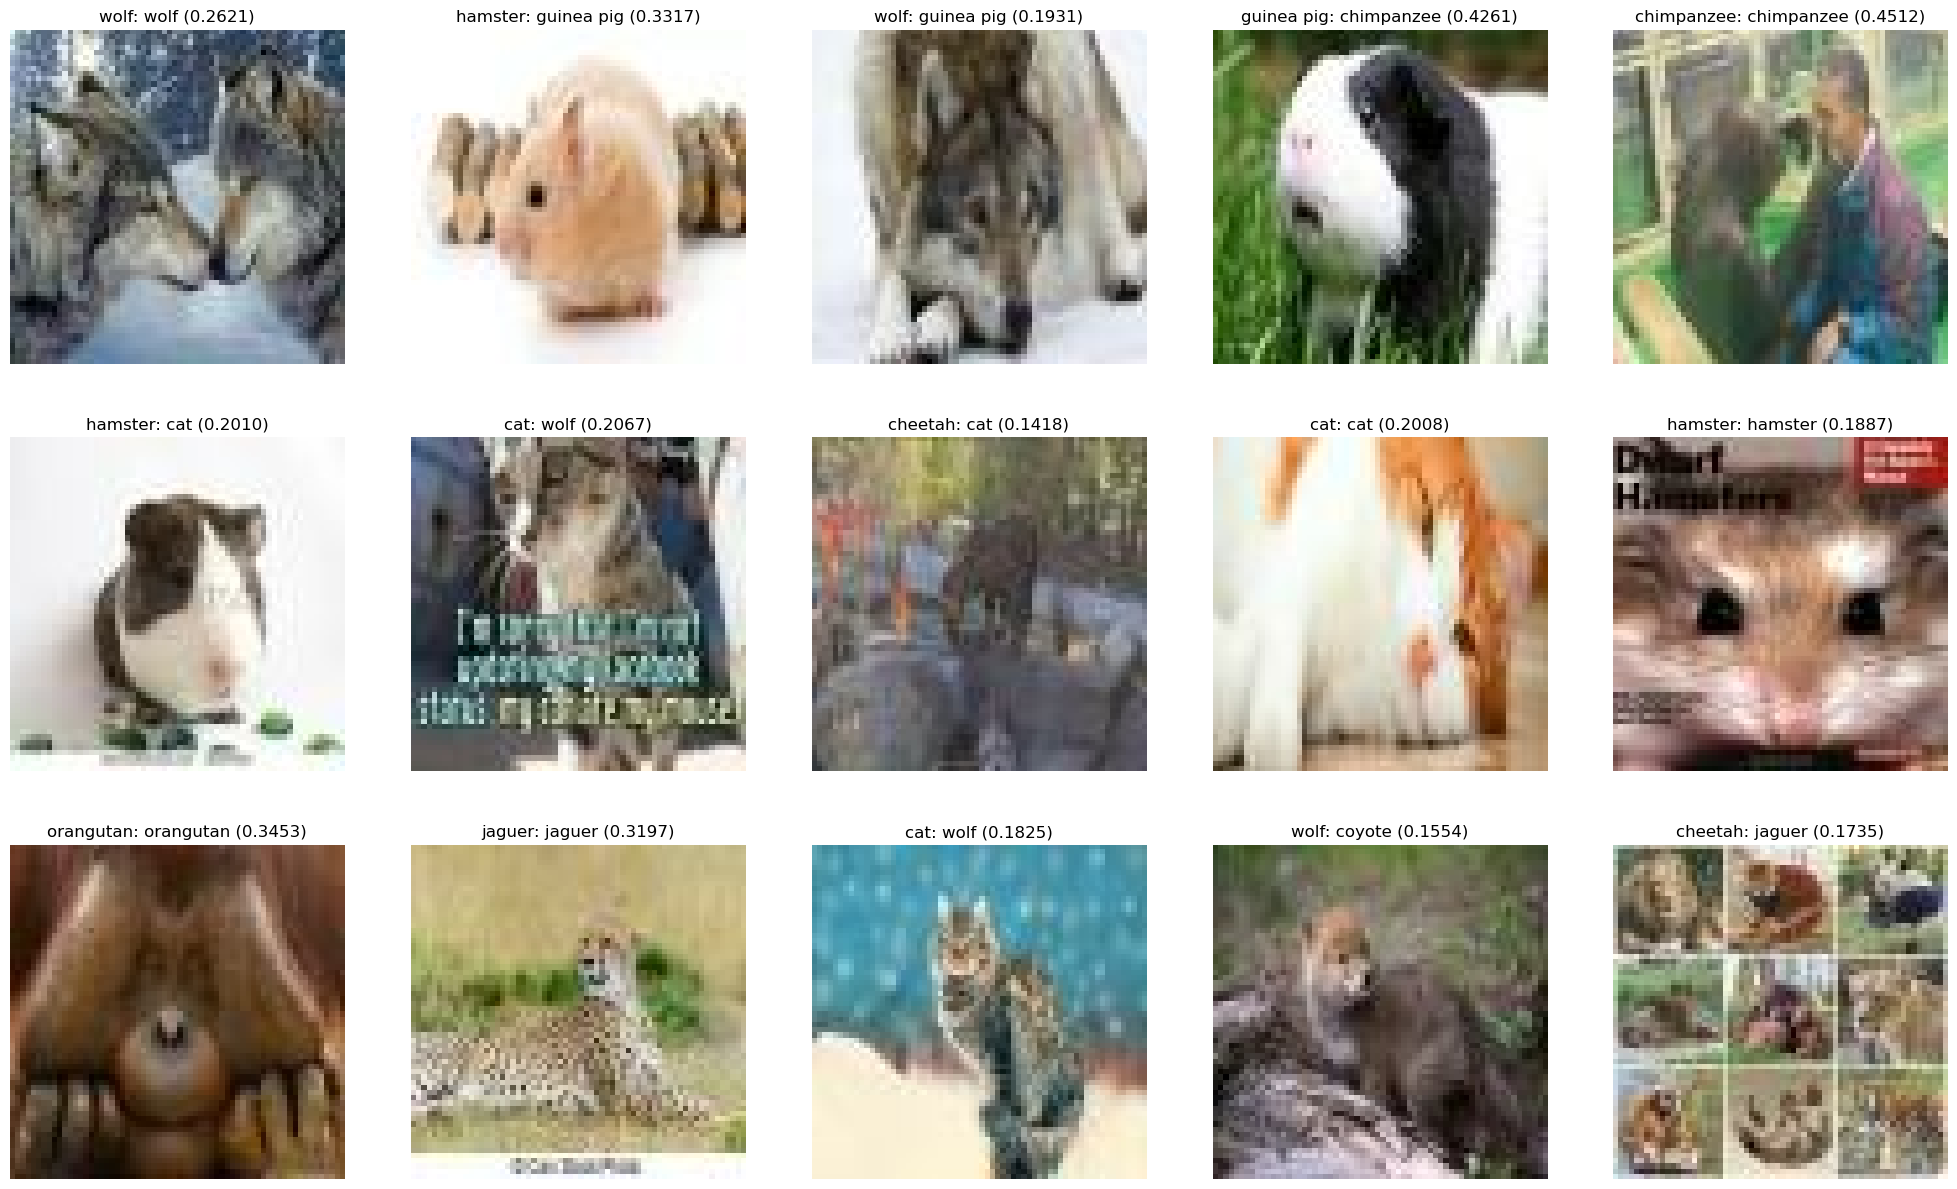

In [90]:
#called plot predictions function using the best model to test the model on test data

plot_predictions(best_model)

In [91]:
#cross-checked to see if the images displayed above and their corresponding predictions are accurate
predictions_best = best_model.predict(test_dataset)
predicted_labels_best = np.argmax(predictions_best, axis =1)

predicted_labels_best[0:15]

47/47 [==============================] - 1s 16ms/step


array([2, 9, 9, 6, 6, 0, 2, 0, 0, 8, 7, 5, 2, 3, 5], dtype=int64)

###### Recall that when we did this exercise earlier, only 1 out of 15 have been correctly predicted. This time around the tuned model got 6 out of 15 correct predictions which is definitely a great improvement from the first model.

## Convolutional neural networks

The network architecture should include several layers with specific details provided. 

Model Architecture:

1. **Convolutional Layer 1:**
    - Filters: 64
    - Kernel Size: 3x3
    - Activation Function: ReLU
    - Input Shape: (64, 64, 3)

2. **MaxPooling Layer 1:**
    - Pool Size: 2x2

3. **Convolutional Layer 2:**
    - Filters: 128
    - Kernel Size: 3x3
    - Activation Function: ReLU

4. **MaxPooling Layer 2:**
    - Pool Size: 2x2

5. **Convolutional Layer 3:**
    - Filters: 256
    - Kernel Size: 3x3
    - Activation Function: ReLU

6. **Convolutional Layer 4:**
    - Filters: 256
    - Kernel Size: 3x3
    - Activation Function: ReLU

7. **MaxPooling Layer 3:**
    - Pool Size: 2x2

8. **Flatten Layer**

9. **Dense Layer 1:**
    - Neurons: 512
    - Activation Function: ReLU

10. **Dropout Layer 1:**
    - Dropout Rate: 0.5

11. **Dense Layer 2:**
    - Neurons: 256
    - Activation Function: ReLU

12. **Dropout Layer 2:**
    - Dropout Rate: 0.5

13. **Dense Output Layer:**
    - Neurons: 10
    - Activation Function: Softmax

In [92]:
# Set random seed for Numpy
np.random.seed(42)
# Set random seed for Python
random.seed(42)
# Set random seed for TensorFlow
tf.random.set_seed(42)

Epoch 1/10
    219/Unknown - 115s 514ms/step - loss: 2.2467 - accuracy: 0.1459INFO:tensorflow:Assets written to: best.model.Q3.1\assets


INFO:tensorflow:Assets written to: best.model.Q3.1\assets


219/219 [==============================] - 124s 557ms/step - loss: 2.2467 - accuracy: 0.1459 - val_loss: 2.1456 - val_accuracy: 0.1880
Epoch 2/10
219/219 [==============================] - ETA: 0s - loss: 2.1012 - accuracy: 0.2231INFO:tensorflow:Assets written to: best.model.Q3.1\assets


INFO:tensorflow:Assets written to: best.model.Q3.1\assets


219/219 [==============================] - 122s 558ms/step - loss: 2.1012 - accuracy: 0.2231 - val_loss: 1.9734 - val_accuracy: 0.2940
Epoch 3/10
219/219 [==============================] - ETA: 0s - loss: 1.9293 - accuracy: 0.3007INFO:tensorflow:Assets written to: best.model.Q3.1\assets


INFO:tensorflow:Assets written to: best.model.Q3.1\assets


219/219 [==============================] - 125s 569ms/step - loss: 1.9293 - accuracy: 0.3007 - val_loss: 1.9515 - val_accuracy: 0.2793
Epoch 4/10
219/219 [==============================] - ETA: 0s - loss: 1.8281 - accuracy: 0.3331INFO:tensorflow:Assets written to: best.model.Q3.1\assets


INFO:tensorflow:Assets written to: best.model.Q3.1\assets


219/219 [==============================] - 123s 562ms/step - loss: 1.8281 - accuracy: 0.3331 - val_loss: 1.7019 - val_accuracy: 0.4013
Epoch 5/10
219/219 [==============================] - ETA: 0s - loss: 1.7128 - accuracy: 0.3810INFO:tensorflow:Assets written to: best.model.Q3.1\assets


INFO:tensorflow:Assets written to: best.model.Q3.1\assets


219/219 [==============================] - 122s 557ms/step - loss: 1.7128 - accuracy: 0.3810 - val_loss: 1.6401 - val_accuracy: 0.4180
Epoch 6/10
219/219 [==============================] - ETA: 0s - loss: 1.6540 - accuracy: 0.4003INFO:tensorflow:Assets written to: best.model.Q3.1\assets


INFO:tensorflow:Assets written to: best.model.Q3.1\assets


219/219 [==============================] - 126s 575ms/step - loss: 1.6540 - accuracy: 0.4003 - val_loss: 1.6324 - val_accuracy: 0.4227
Epoch 7/10
219/219 [==============================] - ETA: 0s - loss: 1.5946 - accuracy: 0.4187INFO:tensorflow:Assets written to: best.model.Q3.1\assets


INFO:tensorflow:Assets written to: best.model.Q3.1\assets


219/219 [==============================] - 122s 558ms/step - loss: 1.5946 - accuracy: 0.4187 - val_loss: 1.6080 - val_accuracy: 0.4333
Epoch 8/10
219/219 [==============================] - ETA: 0s - loss: 1.5313 - accuracy: 0.4513INFO:tensorflow:Assets written to: best.model.Q3.1\assets


INFO:tensorflow:Assets written to: best.model.Q3.1\assets


219/219 [==============================] - 134s 613ms/step - loss: 1.5313 - accuracy: 0.4513 - val_loss: 1.5701 - val_accuracy: 0.4540
Epoch 9/10
219/219 [==============================] - ETA: 0s - loss: 1.4866 - accuracy: 0.4586INFO:tensorflow:Assets written to: best.model.Q3.1\assets


INFO:tensorflow:Assets written to: best.model.Q3.1\assets


219/219 [==============================] - 124s 566ms/step - loss: 1.4866 - accuracy: 0.4586 - val_loss: 1.5640 - val_accuracy: 0.4460
Epoch 10/10
219/219 [==============================] - ETA: 0s - loss: 1.4042 - accuracy: 0.4900INFO:tensorflow:Assets written to: best.model.Q3.1\assets


INFO:tensorflow:Assets written to: best.model.Q3.1\assets


219/219 [==============================] - 124s 568ms/step - loss: 1.4042 - accuracy: 0.4900 - val_loss: 1.5594 - val_accuracy: 0.4607


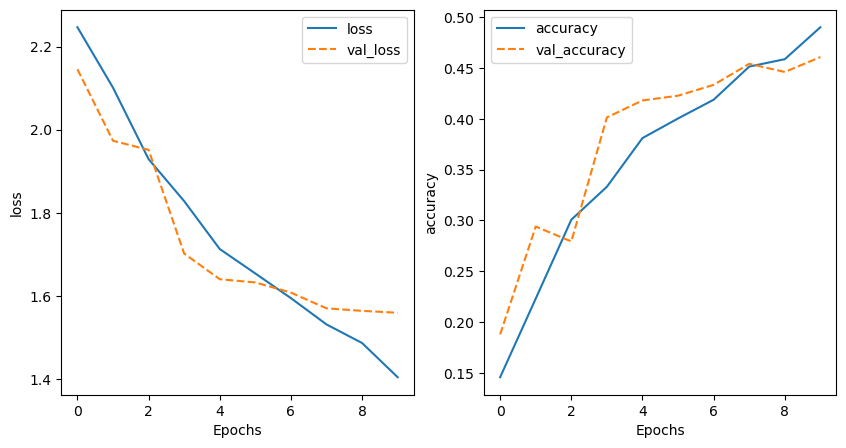

In [93]:
#imported necessary packages
from tensorflow.keras import layers
from tensorflow.keras import models

#defined the convolutional neural network architecture
model1 = models.Sequential()
model1.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu",input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))#Convolutional layer 1
model1.add(layers.MaxPooling2D(pool_size=2))#MaxPooling Layer 1
model1.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu"))#Convolutional Layer 2
model1.add(layers.MaxPooling2D(pool_size=2))#MaxPooling Layer 2
model1.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))#Convolutional Layer 3
model1.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))#Convolutional Layer 4
model1.add(layers.MaxPooling2D(pool_size=2))#MaxPooling Layer 3
model1.add(layers.Flatten())#flatten layer
model1.add(layers.Dense(512, activation='relu'))#Dense Layer 1
model1.add(layers.Dropout(0.5))#Dropout Layer 1
model1.add(layers.Dense(256, activation='relu'))#Dense Layer 2
model1.add(layers.Dropout(0.5))#Dropout Layer 2
model1.add(layers.Dense(10, activation="softmax"))#Dense Output Layer

#Trained the model with the training and used the validation data to determine when to stop training. 
#Determined whether and when it is overfitting, and reported on the evaluation results with the test data.

model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])#Compiled the model using the required settings

#trained the model with the training dataset and used validation dataset to determine when to stop training as instructed
history = model1.fit(train_dataset, validation_data=val_dataset, epochs=10,#epochs was set to 10 as instructed
                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=5),#patience was set to 5 as instructed
                                    tf.keras.callbacks.ModelCheckpoint("best.model.Q3.1",save_best_only=True)])#saved the best model with the filename 'best.model.Q3.1'

training_plot(['loss', 'accuracy'], history)#called function to create a set of subplots based on metrics for comparison


###### Now we can easily see from the subplots above that both the solid lines(training data) and the dashed lines (validation data) for both loss and accuracy have significantly become closer to each other. This signifies that the model has improved in terms of overfitting. Moreover, it is of importance to mention that there are even epochs for both loss and accuracy where the model was not overfitting as the model performed better on the validation data. Additionally, we can observe from the graph and the corresponding numerical values that validation loss is still gradually decreasing. If we maybe try to increase the epochs more, the problem of overfitting here can be fully resolved as we can see from the subplots that the solid and dashed lines for accuracy can possibly converge again if epochs are increased. Nonetheless, as of this point, it seems that this model has handled the problem of overfitting better than the previous models.

In [94]:
#evaluated the model with the test data.
test_loss, test_accuracy = model1.evaluate(test_dataset)

#reported on the evaluation results with the test data as instructed
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)


47/47 [==============================] - 7s 147ms/step - loss: 1.5840 - accuracy: 0.4420
Test loss: 1.5839593410491943
Test accuracy: 0.44200000166893005


###### Now we can see that the accuracy has significantly increased even more. Recall that earlier our accuracy on the test dataset was only about (pre-tuning) 14.4%, and about (post-tuning)25.13%. Earlier test loss results were about (pre-tuning)2.26 and about (post-tuning)2.08. Here, we have an accuracy of about 44.2% and a test loss of only 1.59%  which means that the model has significantly improved in terms of accuracy in predicting the classification/labels of images, and that the information lost has significantly been reduced. However, it is also important to note that the training accuracy is about 49% while the validation accuracy is about 46%. This hints at a slight problem of overfitting since the model performs better on training data but this is just a small margin; and as mentioned above, this can be further optimized by increasing the number of epochs. Overall, it seems that the introduction of convolutions and maxpooling were pivotal in terms of improving the model's performance. 

###### For comparison's sake and to further test our model, we will be showing samples of our model's predictions in the succeeding steps.

1/1 [==============================] - 0s 53ms/step


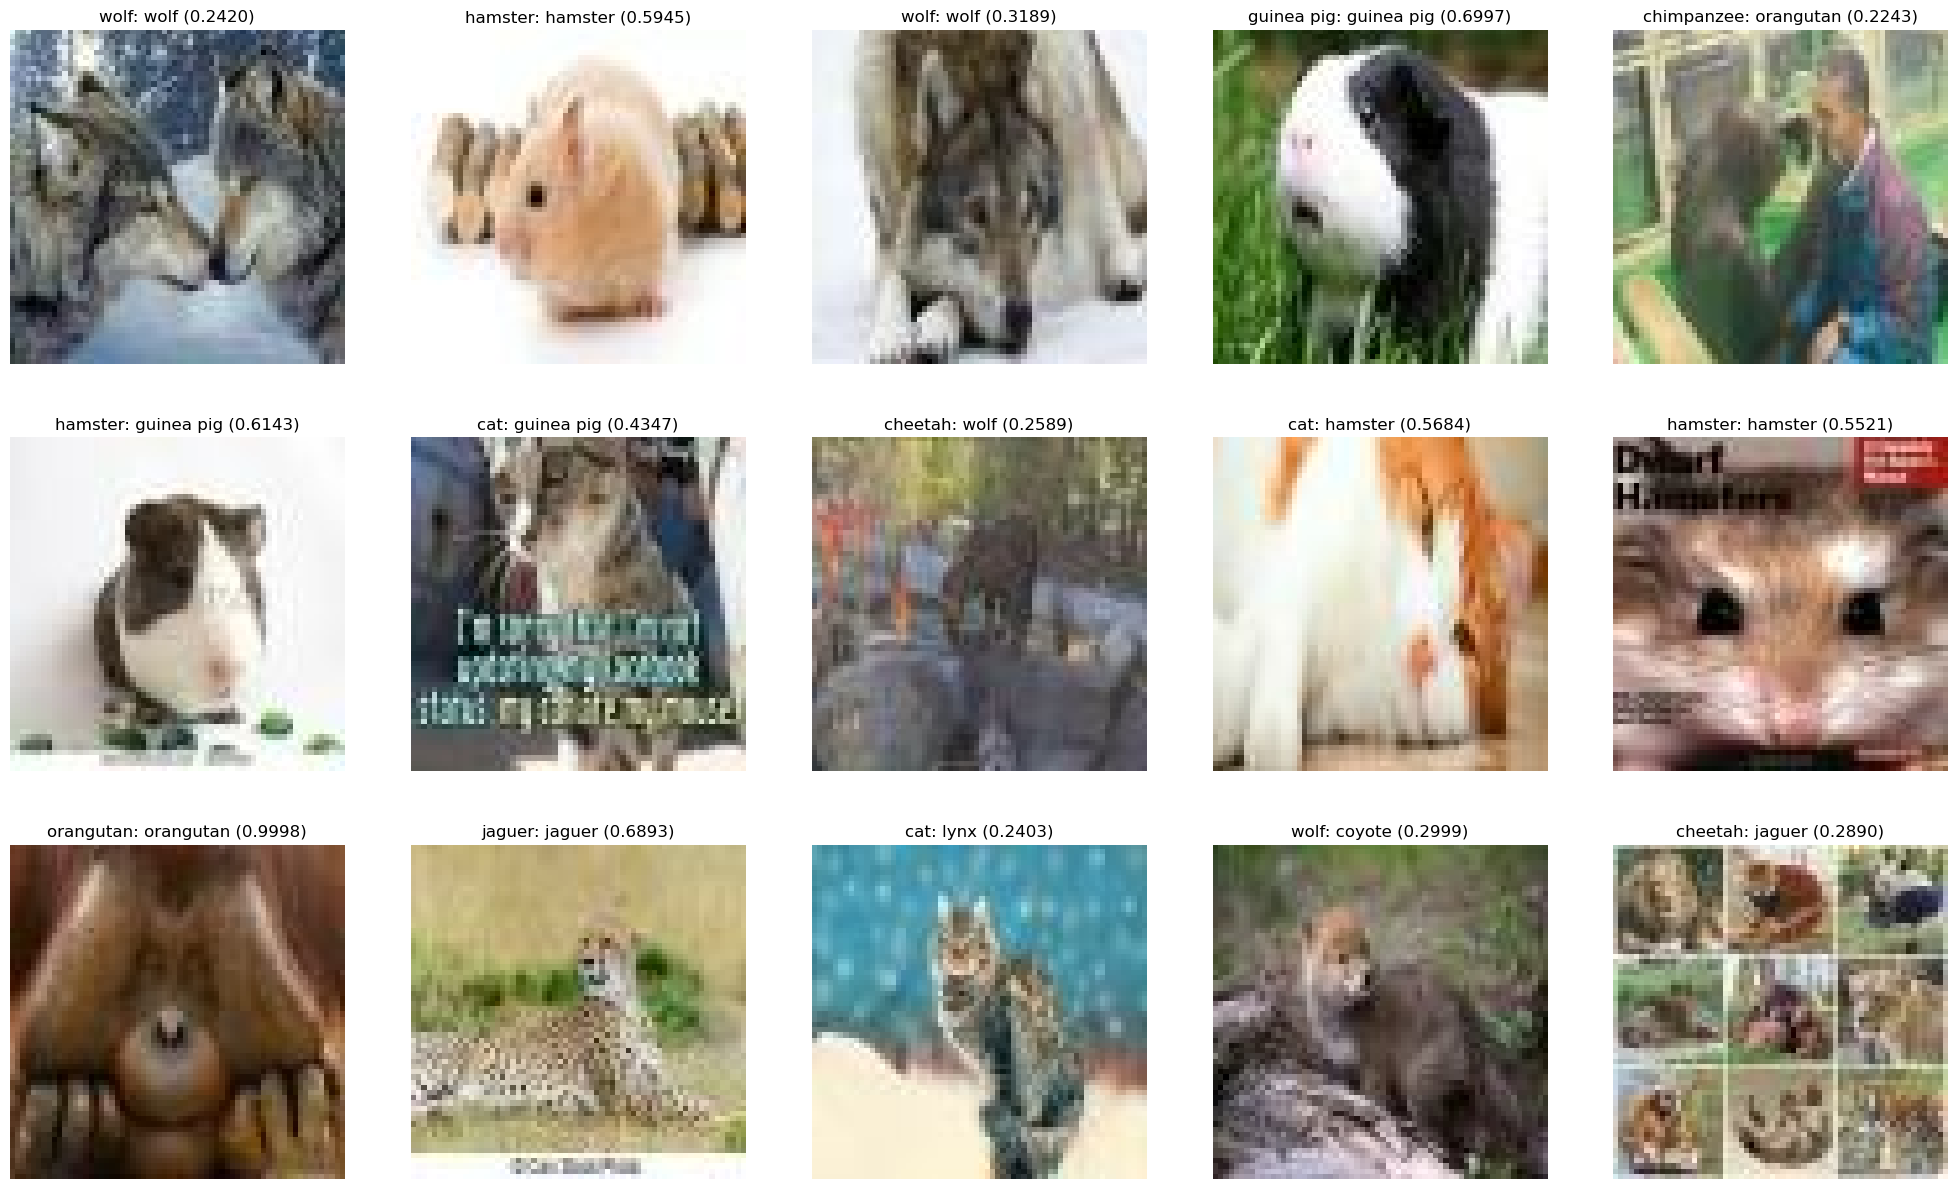

In [95]:
#called plot predictions function to display 15 images and the corresponding predictions of the model
plot_predictions(model1)

In [96]:
#cross-checked to see if the images displayed above and their corresponding predictions are accurate
predictions_cn = model1.predict(test_dataset)
predicted_labels_cn = np.argmax(predictions_cn, axis =1)

predicted_labels_cn[0:15]

47/47 [==============================] - 6s 132ms/step


array([2, 8, 2, 9, 7, 9, 9, 2, 8, 8, 7, 5, 1, 3, 5], dtype=int64)

###### Recall that (pre-tuning) only 1 out of 15 images have been predicted, and (post-tuning) only 6 out of 15. Now, notice that 7 out of 15 images of animals have already been correctly predicted. Moreover, notice how some of the sample probability values are much higher than before (e.g. 0.5945(hamster), 0.6997(guinea pig), 0.6893(jaguer), 0.9998(orangutan), which hints that there is less information lost, and that the model has more inclinations to score high probability values on the correct labels. In other words, the model seems to be more "confident" when it comes to scoring probabilities, and suggests a significant increase in accuracy.

### MobileNetV2, pre-trained on imagenet

In [97]:
# Set random seed for Numpy
np.random.seed(42)
# Set random seed for Python
random.seed(42)
# Set random seed for TensorFlow
tf.random.set_seed(42)

In [98]:
#imported necessary packages
from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow_hub as hub
import os
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

mobilenet_model = tf.keras.applications.MobileNetV2(weights = "imagenet",#used MobileNetV2, pre-trained on imagenet
                                                  input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
                                                  include_top = False,
                                                  pooling = "avg")
#made sure that we freeze the pre-trained weights
for layer in mobilenet_model.layers:
    layer.trainable = False

#defined the model with MobileNetV2
model2 = tf.keras.Sequential()
model2.add(mobilenet_model)
model2.add(layers.Dense(10, activation="softmax"))#Added the correct classification layer


model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])#Compiled the model using the same settings used earlier

#called summary
model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dense_6 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


###### Before we train the model, we first need to make sure that we use a reasonable schedule for the learning rate.  In order to do this, we will make use of the helper function below.

Learning rate schedule: 0.0001 to 0.0001 to 2.21e-05


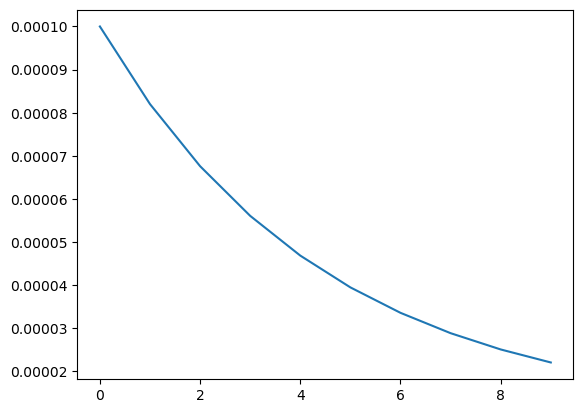

In [99]:
#imported necessary packages
from matplotlib import pyplot as plt

LR_START = 0.00001
LR_MAX = 0.0001
LR_MIN = 0.00001
LR_RAMPUP_EPOCHS = 0
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = .8

#defined a function that sets a learning rate that decreases exponentially at every iteration of the training loop
def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

rng = [i for i in range(10)]#set the range to the number of epochs, 10
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/10
    219/Unknown - 30s 118ms/step - loss: 2.5466 - accuracy: 0.1637

INFO:tensorflow:Assets written to: best.model.Q3.2\assets


INFO:tensorflow:Assets written to: best.model.Q3.2\assets


219/219 [==============================] - 58s 251ms/step - loss: 2.5466 - accuracy: 0.1637 - val_loss: 2.2753 - val_accuracy: 0.2160 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 8.2e-05.
Epoch 2/10
219/219 [==============================] - ETA: 0s - loss: 2.1163 - accuracy: 0.2624

INFO:tensorflow:Assets written to: best.model.Q3.2\assets


INFO:tensorflow:Assets written to: best.model.Q3.2\assets


219/219 [==============================] - 54s 246ms/step - loss: 2.1163 - accuracy: 0.2624 - val_loss: 2.0475 - val_accuracy: 0.2840 - lr: 8.2000e-05

Epoch 3: LearningRateScheduler setting learning rate to 6.760000000000002e-05.
Epoch 3/10
219/219 [==============================] - ETA: 0s - loss: 1.9260 - accuracy: 0.3229INFO:tensorflow:Assets written to: best.model.Q3.2\assets


INFO:tensorflow:Assets written to: best.model.Q3.2\assets


219/219 [==============================] - 56s 256ms/step - loss: 1.9260 - accuracy: 0.3229 - val_loss: 1.9324 - val_accuracy: 0.3287 - lr: 6.7600e-05

Epoch 4: LearningRateScheduler setting learning rate to 5.608000000000001e-05.
Epoch 4/10
219/219 [==============================] - ETA: 0s - loss: 1.8171 - accuracy: 0.3623INFO:tensorflow:Assets written to: best.model.Q3.2\assets


INFO:tensorflow:Assets written to: best.model.Q3.2\assets


219/219 [==============================] - 57s 259ms/step - loss: 1.8171 - accuracy: 0.3623 - val_loss: 1.8636 - val_accuracy: 0.3560 - lr: 5.6080e-05

Epoch 5: LearningRateScheduler setting learning rate to 4.686400000000001e-05.
Epoch 5/10
219/219 [==============================] - ETA: 0s - loss: 1.7460 - accuracy: 0.3841INFO:tensorflow:Assets written to: best.model.Q3.2\assets


INFO:tensorflow:Assets written to: best.model.Q3.2\assets


219/219 [==============================] - 57s 259ms/step - loss: 1.7460 - accuracy: 0.3841 - val_loss: 1.8180 - val_accuracy: 0.3667 - lr: 4.6864e-05

Epoch 6: LearningRateScheduler setting learning rate to 3.949120000000001e-05.
Epoch 6/10
219/219 [==============================] - ETA: 0s - loss: 1.6957 - accuracy: 0.3987INFO:tensorflow:Assets written to: best.model.Q3.2\assets


INFO:tensorflow:Assets written to: best.model.Q3.2\assets


219/219 [==============================] - 58s 265ms/step - loss: 1.6957 - accuracy: 0.3987 - val_loss: 1.7856 - val_accuracy: 0.3820 - lr: 3.9491e-05

Epoch 7: LearningRateScheduler setting learning rate to 3.359296000000001e-05.
Epoch 7/10
219/219 [==============================] - ETA: 0s - loss: 1.6582 - accuracy: 0.4101INFO:tensorflow:Assets written to: best.model.Q3.2\assets


INFO:tensorflow:Assets written to: best.model.Q3.2\assets


219/219 [==============================] - 58s 266ms/step - loss: 1.6582 - accuracy: 0.4101 - val_loss: 1.7614 - val_accuracy: 0.3913 - lr: 3.3593e-05

Epoch 8: LearningRateScheduler setting learning rate to 2.887436800000001e-05.
Epoch 8/10
219/219 [==============================] - ETA: 0s - loss: 1.6292 - accuracy: 0.4193INFO:tensorflow:Assets written to: best.model.Q3.2\assets


INFO:tensorflow:Assets written to: best.model.Q3.2\assets


219/219 [==============================] - 54s 247ms/step - loss: 1.6292 - accuracy: 0.4193 - val_loss: 1.7427 - val_accuracy: 0.3973 - lr: 2.8874e-05

Epoch 9: LearningRateScheduler setting learning rate to 2.509949440000001e-05.
Epoch 9/10
219/219 [==============================] - ETA: 0s - loss: 1.6059 - accuracy: 0.4300INFO:tensorflow:Assets written to: best.model.Q3.2\assets


INFO:tensorflow:Assets written to: best.model.Q3.2\assets


219/219 [==============================] - 57s 260ms/step - loss: 1.6059 - accuracy: 0.4300 - val_loss: 1.7278 - val_accuracy: 0.4040 - lr: 2.5099e-05

Epoch 10: LearningRateScheduler setting learning rate to 2.207959552000001e-05.
Epoch 10/10
219/219 [==============================] - ETA: 0s - loss: 1.5868 - accuracy: 0.4360INFO:tensorflow:Assets written to: best.model.Q3.2\assets


INFO:tensorflow:Assets written to: best.model.Q3.2\assets


219/219 [==============================] - 56s 255ms/step - loss: 1.5868 - accuracy: 0.4360 - val_loss: 1.7156 - val_accuracy: 0.4067 - lr: 2.2080e-05


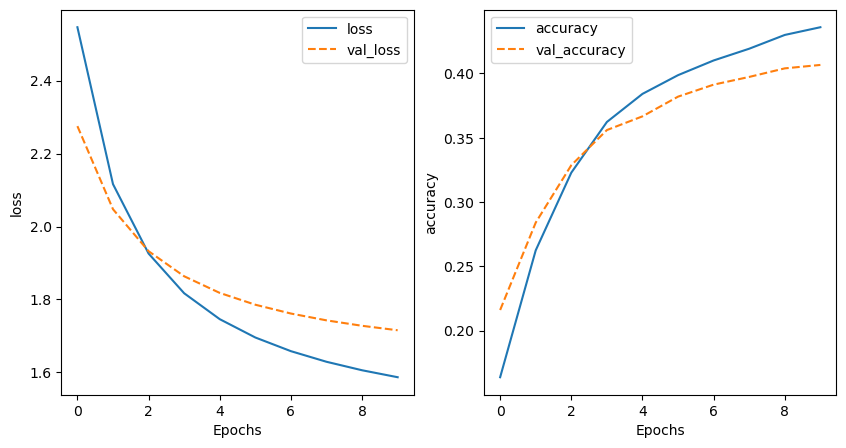

In [100]:
#trained the model with the training dataset and used validation dataset to determine when to stop training
history = model2.fit(train_dataset, validation_data=val_dataset, epochs=10,#epochs was set to 10 similar to previous model
                         callbacks=[lr_callback,#Made sure that we used a reasonable schedule for the learning rate
                                    tf.keras.callbacks.EarlyStopping(patience=5),#patience was set to 5 similar to previous model
                                    tf.keras.callbacks.ModelCheckpoint("best.model.Q3.2",save_best_only=True)])#saved the best model with the filename 'best.model.Q3.2'

training_plot(['loss', 'accuracy'], history)#called function to create set of subplots based on metrics for comparison

###### We can see from the subplots above that the solid line(training data) went below the dashed line (validation data) for loss when it passed by 2 epochs. It also went above the dashed lines for accuracy when it passed by 2 epochs, and we can observe that the solid line and the dashed lines will not converge anymore when we increase the number of epochs. Therefore, contrary to the previous models, this model's overfitting problem can be resolved if we decrease the number of epochs. Nonetheless, similar to the convolution model, the solid lines and the dashed lines here are close to each other. In fact, the difference of the accuracy on the test dataset against the training dataset is only about 3.6% which is relatively smaller to the 5% difference of the convolution model's test dataset and training dataset accuracy. This means that while the model shows a slight problem of overfitting, it still performs well as the overfitting problem is only by a small margin, even smaller than that of the convolution model.

In [101]:
#evaluated the model with the test data.
test_loss, test_accuracy = model2.evaluate(test_dataset)

#reported on the evaluation results with the test data as instructed
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

47/47 [==============================] - 8s 170ms/step - loss: 1.6914 - accuracy: 0.4007
Test loss: 1.6913644075393677
Test accuracy: 0.40066665410995483


###### For the next part, we will display a series of bar graphs to easily visualize and compare the different models(systems).

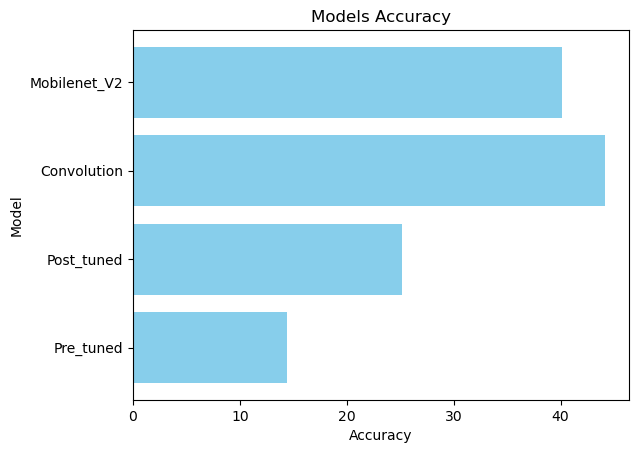

In [102]:
#imported necessary packages
import matplotlib.pyplot as plt

#assigned accuracy values to the following variables
Pre_tuned = 14.4
Post_tuned = 25.13
Convolution = 44.2
Mobilenet_V2 = 40.1

#created a list of accuracy values for plotting
models_accuracy = [Pre_tuned, Post_tuned, Convolution, Mobilenet_V2]
models_list = ['Pre_tuned', 'Post_tuned', 'Convolution', 'Mobilenet_V2']

#plotted the graph for comparison
plt.barh(models_list, models_accuracy, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Models Accuracy')


#displayed the bar graph for models accuracy
plt.show()

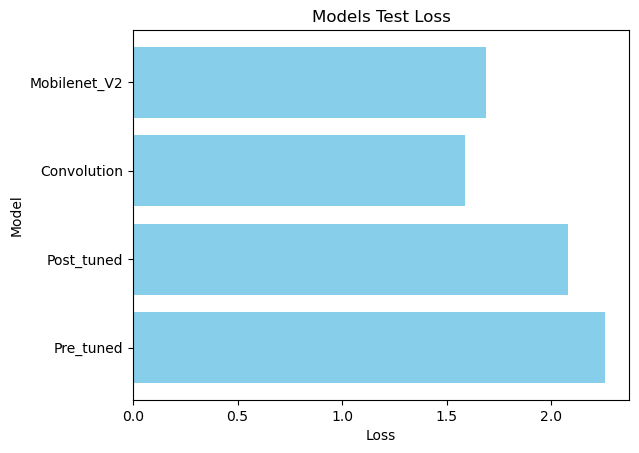

In [103]:
#assigned loss values to the following variables
Pre_tuned_loss = 2.26
Post_tuned_loss = 2.08
Convolution_loss = 1.59
Mobilenet_V2_loss = 1.69

#created a list of loss values for plotting
models_loss = [Pre_tuned_loss, Post_tuned_loss, Convolution_loss, Mobilenet_V2_loss]
models_list = ['Pre_tuned', 'Post_tuned', 'Convolution', 'Mobilenet_V2']

#plotted the graph for comparison
plt.barh(models_list, models_loss, color='skyblue')
plt.xlabel('Loss')
plt.ylabel('Model')
plt.title('Models Test Loss')


#displayed the bar graph for models test loss
plt.show()

###### Now we can see that the Mobilenet_V2 accuracy is quite high and is almost as high as the model from 3.1 where we used convolution layers. Recall that earlier our accuracy on the test dataset was only about (pre-tuning) 14.4%, about (post-tuning)25.13% and (convolution model) 44.2%. Earlier test loss results were about (pre-tuning)2.26, about (post-tuning)2.08, and about (convolution model)1.59. Here, we have an accuracy of about 40.1% and a test loss of only 1.69 which means that the MobilenetV2 model performed really well in predicting the classification/labels of images. However, it is also important to note that the training accuracy is about 43.6% while the validation accuracy is about 40.7%, which like our convolution model, hints at a slight problem of overfitting since the model performs better on training data. However, it is important to note that this is just by a small margin of difference; and recall that both the convolution model and the MobilenetV2 model have solid lines (training data) and dashed lines(validation data) close to each other for their metrics subplot graphs, which means that the overfitting problem for both models are not overwhelming. With these said, it seems that the convolution model performs best followed by the MobilenetV2 model, post-tuned model and the one that performed the worst was the pre-tuned model. This result is testament to how tuning and applying convolutions significantly improve models that deal with image classification. Lastly, it is also important to note that the more datasets the model is able to use for training, the better its performance will be. This has been clearly displayed by MobilenetV2 which was originally trained on a different set of images with different dimensions and yet, it still was able to perform well on our dataset. 


###### Lastly, for comparison's sake and to further test our model, similar to what we did for the previous models, we will be showing samples of our model's predictions in the succeeding steps.

1/1 [==============================] - 0s 44ms/step


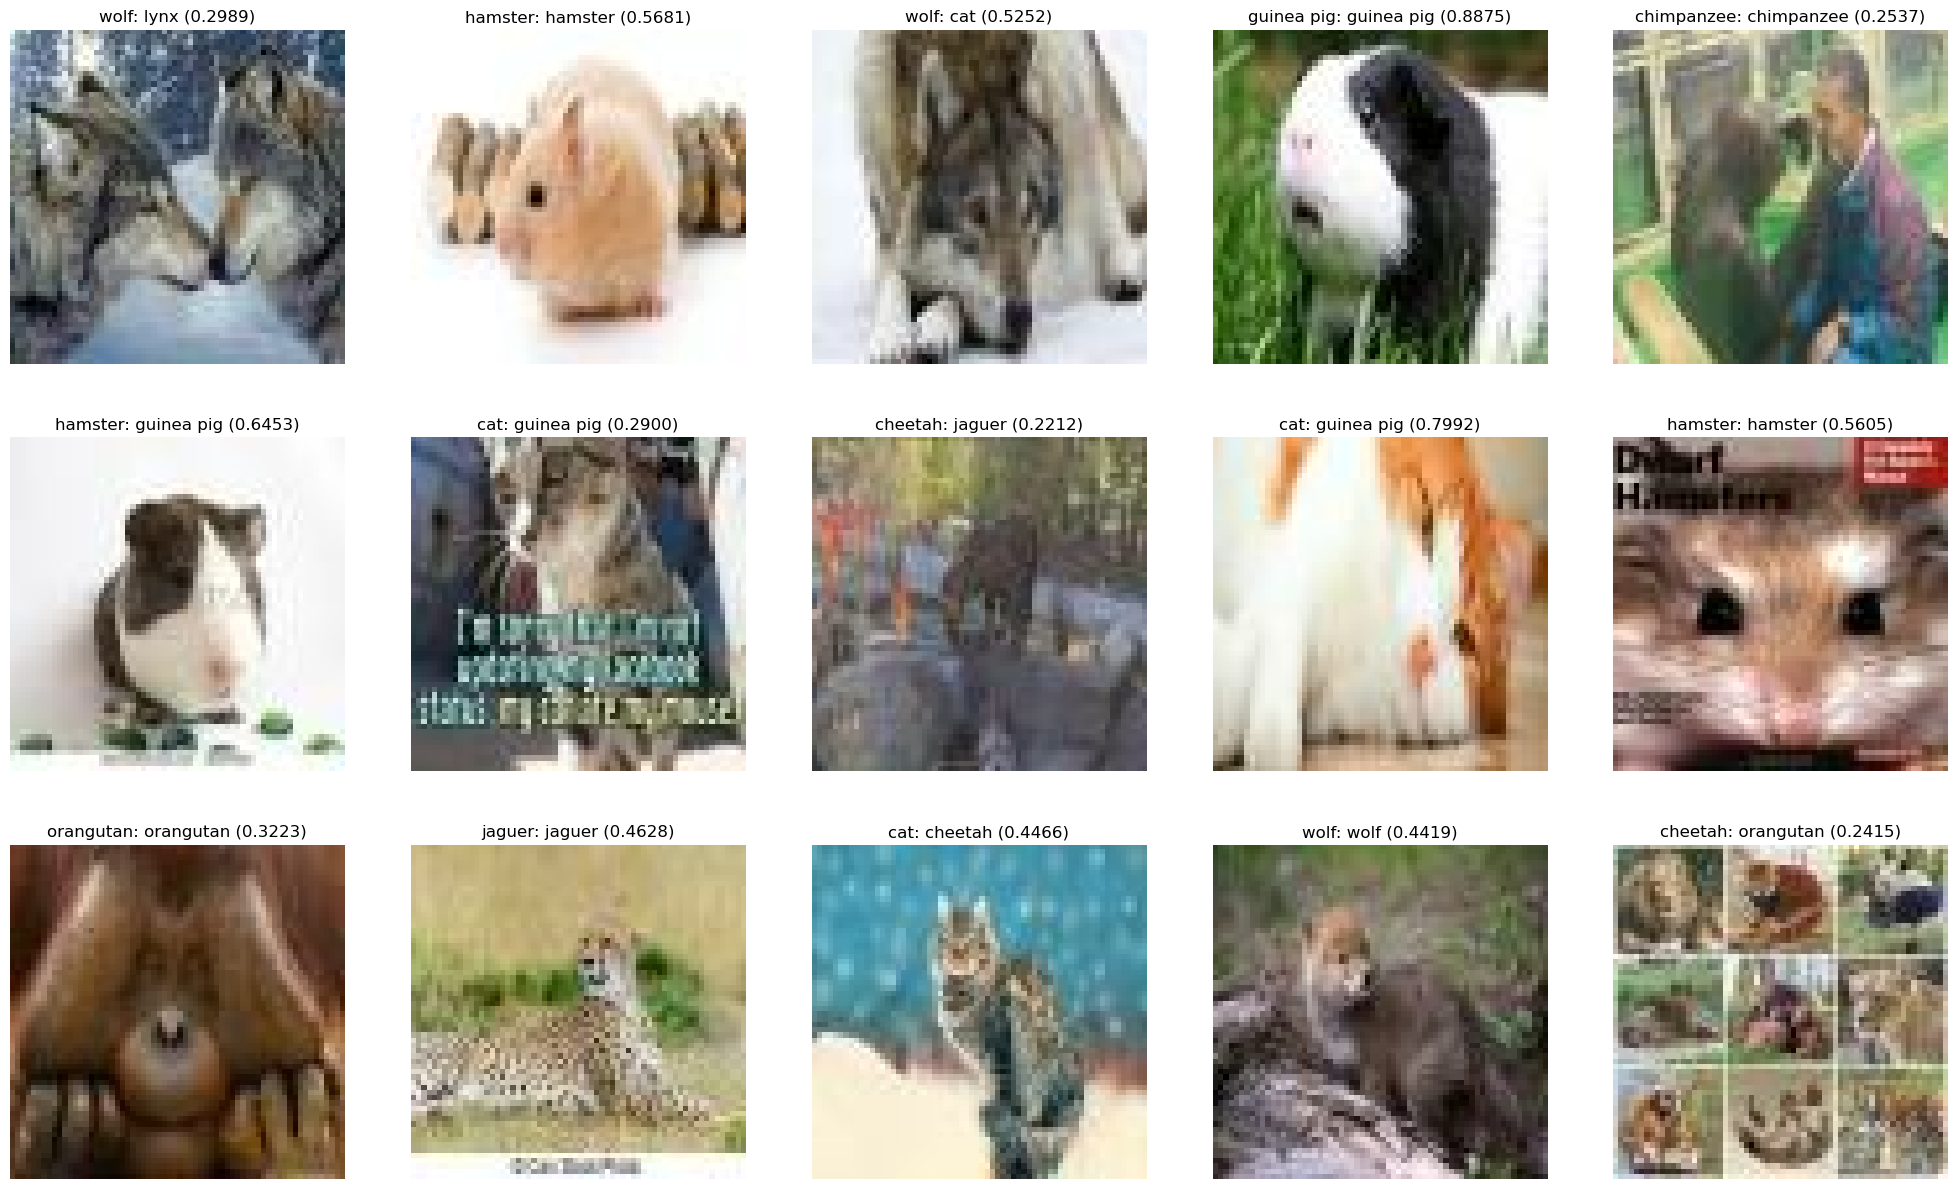

In [104]:
#called plot predictions function to display 15 images and the corresponding predictions of the model
plot_predictions(model2)

In [105]:
#cross-checked to see if the images displayed above and their corresponding predictions are accurate
predictions_v2 = model2.predict(test_dataset)
predicted_labels_v2 = np.argmax(predictions_v2, axis =1)

predicted_labels_v2[0:15]

47/47 [==============================] - 9s 160ms/step


array([1, 8, 0, 9, 6, 9, 9, 5, 9, 8, 7, 5, 4, 2, 7], dtype=int64)

###### Recall that (pre-tuning) only 1 out of 15 images have been predicted, (post-tuning) 6 out of 15, and (convolution model) 7 out of 15. Now, notice that 7 out of 15 images of animals have already been correctly predicted, which is the same as that of the convolution model. Moreover, notice how some of the sample probability values are much higher than before, similar to the convolution model (e.g. 0.5681(hamster), 0.8875(guinea pig), which also hints that there is less information lost, and that the model has more inclinations to score high probability values on the correct labels. In other words, the model seems to be more "confident" when it comes to scoring probabilities, and suggests a significant increase in accuracy. All in all, the MobileNetV2 model is performing really well, and is almost as accurate as our convolution model.